***
# 1. Introduction

Transjakarta, the largest bus rapid transit (BRT) system in the world, serves as a vital component of Jakarta's public transportation network. Launched in 2004, it was designed to alleviate the city’s notorious traffic congestion and provide an efficient, affordable means of travel for millions of commuters. With over 250 routes and thousands of buses, Transjakarta has significantly improved urban mobility. PT Transjakarta is owned by the government of DKI Jakarta. The government is the main stakeholder and thus the main audience for this project. Transjakarta has a stated vision of facilitating the integration of transportation services in Jakarta, with the objective of enhancing the quality of life for residents and visitors alike. The company's mission is to provide reliable and comfortable public transportation.

This project delves into the data analytics of Transjakarta's operations, exploring patterns in ridership, passenger profiles, and areas for potential improvement. By leveraging data insights, the aim is to enhance the efficiency and effectiveness of this critical public service.

***
# 2. Business Problems & Questions

As a provider of public transport services, PT Transjakarta's objective is to offer a safe and comfortable journey for all its users. It is hoped that in the future, a greater number of individuals, particularly those residing in Jakarta and the surrounding areas, will opt to utilise Transjakarta for their daily commute. This would result in a reduction in congestion in Jakarta and a reduction in greenhouse gas emissions.

To improve the service, PT Transjakarta is seeking to idenitify any specific patterns in its user data that could be leveraged as insights with respect to the following characteristics:

1. insight into the patterns of journeys . 
* What is the average journey duration of Transjakarta users?
* When does the level of usage increase and by how much?

2. Corridor-specific patterns
* Which corridors are the busiest?
* Is the corridor bus capacity adequate?

3. Bus stop-specific patterns
* Which bus stops are the busiest?
* How to improve services at bus stops?

4. Information regarding the characteristic patterns of Transjakarta users:
* By gender: What is the ratio of female to male users?
* By age: What is the age of the majority of users? Are there elderly users?


***
# 3. Understanding the Data

Effective analysis of Transjakarta's operations begins with a comprehensive understanding of the data we have.  

### Load the Dataset

In [9]:
# Import library
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the CSV file into a DataFrame
df = pd.read_csv("Transjakarta.csv")

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [10]:
df.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [11]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

## A. Overview
There are 22 columns in the dataset : 

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc.Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not. are free. Some not.


## B. General info & summary of the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [16]:
#summary of nummerical 
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [17]:
# summary for all data (incl. categorical)
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [18]:
first_tapIn = df.sort_values(by='tapInTime')['tapInTime'].min()
last_tapIn = df.sort_values(by='tapInTime')['tapInTime'].max()
print("first tap-in data is on ", first_tapIn, "\nlast tap-out data is on", last_tapIn, "\n"
)

first tap-in data is on  2023-04-01 06:22:27 
last tap-out data is on 2023-04-30 21:55:41 



## C. Check for missing and duplicate values

In [20]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [21]:
# Check for missing rows and duplicated values
print("Sum of missing rows: ", df.isnull().all(axis=1).sum())
print("Sum of duplicated rows: ", df.duplicated().sum())

Sum of missing rows:  0
Sum of duplicated rows:  0


## D. Check data formatting

In [23]:
# checking "corridorName" column for incorrect data format
corridor_names = df["corridorName"].unique()
string_corridor_names = [name for name in corridor_names if pd.notnull(name) and isinstance(name, str)]

sorted_corridor_names = sorted(string_corridor_names)
sorted_corridor_names
# all values correct, no typo

['Andara - Stasiun Universitas Pancasila',
 'BKN - Blok M',
 'BSD - Jelambar',
 'BSD Serpong - Fatmawati',
 'Batusari - Grogol',
 'Bekasi Barat - Blok M',
 'Bekasi Barat - Kuningan',
 'Bekasi Timur - Cawang',
 'Bintara - Cipinang Indah',
 'Bintaro - Blok M',
 'Bintaro - Fatmawati',
 'Blok M - Andara',
 'Blok M - Kota',
 'Blok M - PGC',
 'Blok M - Pasar Minggu',
 'Blok M - Universitas Indonesia',
 'Bulak Ringin - Kampung Rambutan',
 'Bulak Turi - Tanjung Priok',
 'Cawang UKI - Lubang Buaya',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading',
 'Cibubur - BKN',
 'Cibubur - Balai Kota',
 'Cibubur - Kuningan',
 'Cibubur Junction - Blok M',
 'Cilangkap - Cililitan',
 'Ciledug - Tendean',
 'Cililitan - Condet',
 'Cililitan - Condet via Kayu Manis',
 'Cililitan - Dwikora',
 'Cililitan - Kp. Pulo',
 'Cilincing - Rorotan',
 'Cinere - Bundaran Senayan',
 'Cinere - Kuningan',
 'Ciputat - CSW',
 'Ciputat - Kampung Rambutan',
 'Depok - BKN',
 'Dukuh Atas - Casablanca via Epicentrum Raya',
 'Dwikora -

In [24]:
# checking "payCardBirthDate" column for incorrect data format
year = df["payCardBirthDate"].unique()
year
# all values correct, no typo

array([2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988,
       2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960,
       1995, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005,
       1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987, 1996,
       1971, 1956, 1980, 1998, 1973, 1946, 1976, 1959, 1967, 1951, 1957,
       1948, 1961, 1964, 1963, 1962, 1949, 1954, 1947, 1952, 1958, 1955,
       1950], dtype=int64)

In [25]:
# checking "payCardBank" column for incorrect data format
bank = df["payCardBank"].unique()
bank
# all values correct, no typo

array(['emoney', 'dki', 'flazz', 'online', 'brizzi', 'bni'], dtype=object)

## E. Key Takeaways

1. Total data : 37900 rows
2. This data has time-range from 1 April 2023 to 30 April 2023
3. There are some columns with missing data (Null/NaN)
* "corridorID" 
* "corridorName"
* "tapInStops"
* "tapOutStops"
* "tapOutStopsName"
* "tapOutStopsLat" * "tapOutStopsLon"
* "4p
taTi:T" \023
4. Data type on "tapInTime" and "tapOutTime" is object. These columns need to ben coverted into daiet.007

# 4. Data Cleaning

## A. Missing values in the dataset

In [30]:
# finding our how many data (values) are missing and its percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

pd.DataFrame({"Missing value count": missing_values, "Missing value (%)": missing_percentage})

,Missing value count,Missing value (%)
transID,0,0.000000
payCardID,0,0.000000
payCardBank,0,0.000000
payCardName,0,0.000000
payCardSex,0,0.000000
payCardBirthDate,0,0.000000
corridorID,1257,3.316623
corridorName,1930,5.092348
direction,0,0.000000
tapInStops,1213,3.200528


In general, missing values are not significant (less than 5%) except for the corridorName and tapOutStops columns.\
It is necessary to handle missing values to minimise data gaps that may affect the accuracy of the analysis.


### Data cleaning strategy:
- some of the column values can be refered to info from other column (e.g corridorName with reference from corridorID, tapInStop with tapInStopsName, tapOutStops with tapOutStopsName )
- some values could be transformed:e.g. pay amount with values refering to its corridor ID 
- or dropped (e.g) tapOutStopsLat and tapOutStopsLon due to difficulties in acquiring accurate data, and its insignificance to the analysis.

## B. Handling missing values in "corridorName" and "corridorID" columns

"corridorID" and "corridorName" represent the same thing. Thus value from one column can be used as a reference to the other.

In [34]:
# missing values on "corridorID" column
df["corridorID"].isna().sum()

1257

In [35]:
# missing values on "corridorName" column
df["corridorName"].isna().sum()

1930

In [36]:
# missing values on both "corridorID" and "corridorName" column
len(df[
    (df["corridorID"].isna()) & 
    (df["corridorName"].isna())])

1125

From the numbers above, we can reduce the missing values in "corridorID" and "corridorName" from 1257 and 1930 respectively, to 1125 

#### Mapping all available "corridorName" with its "corridorID"

In [39]:
# Drop rows with missing "corridorName" and remove duplicate rows based on "corridorID"
# This resulted in all unique "corridorName" with its ID available in the dataset
corridorName_available = df.dropna(subset=["corridorName"]).drop_duplicates("corridorID")
corridorName_table = corridorName_available.set_index("corridorID")["corridorName"]
corridorName_table

corridorID
5                                  Matraman Baru - Ancol
6C              Stasiun Tebet - Karet via Patra Kuningan
R1A                                   Pantai Maju - Kota
11D                  Pulo Gebang - Pulo Gadung 2 via PIK
12                                 Tanjung Priok - Pluit
                               ...                      
1R                                   Senen - Tanah Abang
7B                             Kampung Rambutan - Blok M
M5                                 Matraman Baru - Ancol
JAK.99                       Term. Pulo Gadung - Lampiri
JAK.12    Tanah Abang - Kebayoran Lama via Pos Pengumben
Name: corridorName, Length: 222, dtype: object

#### Fill in the missing values in "corridorName" column

In [41]:
def fill_corridorName(row):
    if pd.isnull(row["corridorName"]) and pd.notnull(row["corridorID"]):
        return corridorName_table.get(row["corridorID"])
    return row["corridorName"]

df["corridorName"] = df.apply(fill_corridorName, axis = 1)

In [42]:
df["corridorName"].isna().sum()

1125

#### Mapping all available "corridorID" with its "corridorName"

The same method (above) will be applied to "corridorID" column

In [44]:
corridorID_available = df.dropna(subset=["corridorID"]).drop_duplicates("corridorName")
corridorID_table = corridorID_available.set_index("corridorName")["corridorID"]
corridorID_table

corridorName
Matraman Baru - Ancol                                  5
Stasiun Tebet - Karet via Patra Kuningan              6C
Pantai Maju - Kota                                   R1A
Pulo Gebang - Pulo Gadung 2 via PIK                  11D
Tanjung Priok - Pluit                                 12
                                                   ...  
Grogol - Pos Pengumben via Slipi                  JAK.53
Senen - Tanah Abang                                   1R
Kampung Rambutan - Blok M                             7B
Term. Pulo Gadung - Lampiri                       JAK.99
Tanah Abang - Kebayoran Lama via Pos Pengumben    JAK.12
Name: corridorID, Length: 216, dtype: object

#### Fill in the missing values in "corridorID" column

In [46]:
def fill_corridorID(row):
    if pd.isnull(row["corridorID"]) and pd.notnull(row["corridorName"]):
        return corridorID_table.get(row["corridorName"])
    return row["corridorID"]

df["corridorID"] = df.apply(fill_corridorID, axis = 1)

In [47]:
df["corridorID"].isna().sum()

1125

#### Result

The number of missing values from both "corridorName" and "corridorID" columns has been reduced to 1125 rows



## C. Handling missing values in "tapInStops" column

Similarly to "corridorID" and "corridorName" columns,
"tapInStops" and "tapInStopsName" represent the same thing. Thus value from one column can be used as a reference to the other.

In [52]:
# missing values on "tapInStops" column
df["tapInStops"].isna().sum()

1213

In [53]:
# missing values on "tapInStopsName" column
df["tapInStopsName"].isna().sum()

0

Missing values in "tapInStops" column can be filled using the name from "tapInStopsName" column

#### Mapping all available "tapInStops" with its "tapInStopsName"

In [56]:
tapInStops_available = df.dropna(subset=["tapInStops"]).drop_duplicates("tapInStopsName")
tapInStops_table = tapInStops_available.set_index("tapInStopsName")["tapInStops"]
tapInStops_table

tapInStopsName
Pal Putih                       P00142
Kemenkes 2                     B01963P
Gg. Kunir II                   B00499P
Taman Elok 1                   B05587P
Sunter Boulevard Barat          P00239
                                ...   
Jatinegara Timur               B01732P
Jln. Pancoran Timur III        B01450P
AKR Tower                      B00018P
Jln. Kartika Meruya Selatan    B01209P
Jln. Gunung Galunggung 1       B01087P
Name: tapInStops, Length: 2569, dtype: object

#### Fill in the missing values in "tapInStops" column

In [58]:
def fill_tapInStops(row):
    if pd.isnull(row["tapInStops"]) and pd.notnull(row["tapInStopsName"]):
        return tapInStops_table.get(row["tapInStopsName"])
    return row["tapInStops"]

df["tapInStops"] = df.apply(fill_tapInStops, axis = 1)

In [59]:
df['tapInStops'].isna().sum()

34

#### Result

There are 34 missing values from "tapInStops" column cannot be filled. tapInStops information is missing in the dataset.

## D. Handling missing "tapOutStops"data

In [63]:
# missing values on "tapOutStops" column
df["tapOutStops"].isna().sum()

2289

In [64]:
# missing values on all column realted to tap out
len(df[
    (df["tapOutStops"].isna()) & 
    (df["tapOutStopsName"].isna()) & 
    (df["tapOutStopsLat"].isna()) & 
    (df["tapOutStopsLon"].isna()) & 
    (df["stopEndSeq"].isna()) & 
    (df["tapOutTime"].isna())
])

1344

#### Mapping all available "tapOnStops" with its "tapOutStopsName"

In [66]:
tapOutStops_available = df.dropna(subset=["tapOutStops"]).drop_duplicates("tapOutStopsName")
tapOutStops_table = tapOutStops_available.set_index("tapOutStopsName")["tapOutStops"]
tapOutStops_table

tapOutStopsName
Tegalan                   P00253
Sampoerna Strategic      B03307P
Simpang Kunir Kemukus    B04962P
Raya Penggilingan        B03090P
Kali Besar Barat          P00098
                          ...   
Baladewa Residence       B00100P
Grand Centro Bintaro     B00688P
SMKN 56                  B05324P
MNC Studios              B02471P
RSUD Cengkareng          B03207P
Name: tapOutStops, Length: 2229, dtype: object

#### Fill in the missing values in "tapOutStops" column

In [68]:
def fill_tapOutStops(row):
    if pd.isnull(row["tapOutStops"]) and pd.notnull(row["tapOutStopsName"]):
        return tapOutStops_table.get(row["tapOutStopsName"])
    return row["tapOutStops"]

df["tapOutStops"] = df.apply(fill_tapOutStops, axis = 1)

In [69]:
df["tapOutStops"].isna().sum()

1363

#### Result

There are 1344 missing values from when the passengers exited the Transjakarta card tap system. \
This may be due to a malfunction of the tapOut machine at Transjakarta bus stops. \
_(Source: https://metro.tempo.co/read/1644818/sistem-tap-in-dan-tap-out-transjakarta-sempat-bermasalah-ini-cara-mengadu-ke-ylki)_ \
\
Similar to previous columns, we can reduce the missing values in "tapOutStops" from 2289 up to 1344 \
\
There are 19 "tapOutStops" for which no value was found in the "tapOutStopsName" column.

### E. Handling missing values on "payAmount" column

In [73]:
# missing values on "payAmount" column
df["payAmount"].isna().sum()

1007

In [74]:
# tarrifs per transaction
df["payAmount"].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

There are only 4 different amount of payment found in the dataset: 3500, 20000, 0 and null. 

In [76]:
# corridors that cost IDR 0
corridor_0 = df[df["payAmount"] == 0]["corridorID"].unique().tolist()
print("Corridors that cost IDR 0 are: ", corridor_0)

Corridors that cost IDR 0 are:  ['JAK.18', nan, 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B', 'BW9', 'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19', 'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C', '2F', 'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E', 'JAK.13', 'JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01', 'JAK.120', 'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86', '9F', '11P', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45', 'JAK.110A', 'JAK.51', 'JAK.54', 'JAK.03', 'JAK.25', 'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', '11K', '10B', 'JAK.30', 'JAK.58', 'JAK.34', '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59', 'JAK.113', 'JAK.04', '12F', 'JAK.61', 'JAK.24', '11C', 'JAK.35', 'JAK.38', 'JAK.33', 'JAK.05', '11B', 'JAK.106', 'JAK.28', 'JAK.53', 'JAK.99', 'JAK.12']


In [77]:
# corridors that cost IDR 3,500
corridor_3500 = df[df["payAmount"] == 3500]["corridorID"].unique().tolist()
print("Corridors that cost IDR 3500 are: ", corridor_3500)


Corridors that cost IDR 3500 are:  ['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13', '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D', '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7', '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11', '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', nan, '6M', 'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4', '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12', '1N', 'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3', 'M6', '8', '6D', '1H', '4C', 'M13', '8D', '4D', '7', '9C', 'D21', 'D11', '8M', '1B', '12H', '7F', '6', '10H', '3E', '9', '1A', '2Q', '1R', '7B', 'M5']


In [78]:
# corridors that cost IDR 20,000
corridor_20000 = df[df["payAmount"] == 20000]["corridorID"].unique().tolist()
print("Corridors that cost IDR 20000 are: ", corridor_20000)

Corridors that cost IDR 20000 are:  ['1T', 'B14', 'T21', 'D32', 'S31', nan, 'B13', 'D31', '1K', '6P', 'S12']


The pay amount corresponds to which corridors the passengers took. _(Source: https://transjakarta.co.id/faq-transjakarta/)_
1. The regular fare of Transjakarta between 07:00 - 04:49 is Rp 3,500.
2. Transjakarta premium service fare, Royaltrans Rp 20,000
3. Microtrans fare is Rp 0 with Jak Lingko card . 20.000

#### Fill in the missing values in "payAmount" column

In [81]:
def fill_payAmount(row):
    if row["corridorID"] in corridor_0 and pd.isna(row["payAmount"]):
        return 0
    elif row["corridorID"] in corridor_3500 and pd.isna(row["payAmount"]):
        return 3500
    elif row["corridorID"] in corridor_20000 and pd.isna(row["payAmount"]):
        return 20000
    else:
        return row["payAmount"]

In [82]:
df["payAmount"] = df.apply(fill_payAmount, axis=1)

In [83]:
#check if there are still missing values
df["payAmount"].isna().sum()

979

There are still some missing values, although we have already filled in the tariff values for each corridor available in the table.

#### Fill in the missing values in "payAmount" column (refer to othe source)

In [86]:
print("The missing corridor name : ")
df[df["payAmount"].isna()]["corridorID"].value_counts()

The missing corridor name : 


corridorID
M7B        310
JAK.48A    249
M1H        171
JAK.48B    159
3H          90
Name: count, dtype: int64

There are only 5 corridors with missing values. we can find the fare data for each corridor from other sources and fill in the values manually.
1. Corridor M7B : IDR 3,500
2. Corridor M1H : IDR 3,500 
3. Corridor 3H : IDR 3,500
4. Corridor JAK.48A : IDR 0
5. Corridor JAK.48B : IDR 0

_(Source: https://transjakarta.co.id/faq-transjakarta/)_

In [88]:
tariff_3500 = ["M7B", "M1H", "3H"]
tariff_0 = ["JAK.48A", "JAK.48B"]

In [89]:
def fill_payAmount_tariff(row):
    if row["corridorID"] in tariff_0 and pd.isna(row["payAmount"]):
        return 0
    elif row["corridorID"] in tariff_3500 and pd.isna(row["payAmount"]):
        return 3500
    else:
        return row["payAmount"]

df["payAmount"] = df.apply(fill_payAmount_tariff, axis=1)

In [90]:
#check if there are still missing values
df["payAmount"].isna().sum()

0

#### Result

All missing values from "payAmount" column has been filled

### F. Data cleaning done : Remaining missing values in the dataset

In [94]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

pd.DataFrame({"Missing value count": missing_values, "Missing value (%)": missing_percentage})

,Missing value count,Missing value (%)
transID,0,0.000000
payCardID,0,0.000000
payCardBank,0,0.000000
payCardName,0,0.000000
payCardSex,0,0.000000
payCardBirthDate,0,0.000000
corridorID,1125,2.968338
corridorName,1125,2.968338
direction,0,0.000000
tapInStops,34,0.089710


#### Key takeaways

After some of the missing values were filled, the remaining missing values ranges become less significant, ranging from 2,97% - 3,60%. \
Column with missing values are: 
* corridorID & corridorName : 2.97 %
* tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime : 3.60% 


**Rows with missing values are left as they are (not dropped) in order not to lose valuable information, as the corresponding data in other columns are useful for the analysis.**


### G. Change data type on "tapInTime" and "tapOutTime" into datetime

In [98]:
df["tapInTime"] = pd.to_datetime(df['tapInTime'])
df["tapOutTime"] = pd.to_datetime(df['tapOutTime'])

### H. Add columns to support analysis

Additonal column are needed in order to make meaningful analysis, among others:
* trip duration
* day of the trip
* date of the trip
* passenger age
* passenger age category (children, adolescent, adult, elderly)

In [101]:
# calculate the duration of each trip
df["tripDuration"] = df["tapOutTime"] - df["tapInTime"]
df["tripDuration"]

0       0 days 00:39:09
1       0 days 00:57:17
2       0 days 00:51:49
3       0 days 00:43:25
4       0 days 00:39:28
              ...      
37895   0 days 01:37:12
37896   0 days 00:35:51
37897   0 days 02:57:38
37898   0 days 00:28:24
37899   0 days 00:26:41
Name: tripDuration, Length: 37900, dtype: timedelta64[ns]

In [102]:
# the day of each trip
day_of_week = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
df["tapInDay"] = df['tapInTime'].dt.dayofweek.map(day_of_week)
df["tapOutDay"] = df['tapOutTime'].dt.dayofweek.map(day_of_week)

In [103]:
# the date of each trip
df["tapInDate"] = df['tapInTime'].dt.strftime('%d')

In [104]:
# the hour of each trip
df["tapInHour"] = df['tapInTime'].dt.hour
df["tapOutHour"] = df['tapOutTime'].dt.hour

In [105]:
df["tapInHour"]

0         5
1         5
2         5
3         5
4         6
         ..
37895    18
37896    21
37897    10
37898    19
37899    21
Name: tapInHour, Length: 37900, dtype: int32

In [106]:
df["tapOutHour"]

0         6.0
1         6.0
2         6.0
3         6.0
4         6.0
         ... 
37895    19.0
37896    22.0
37897    13.0
37898    20.0
37899    21.0
Name: tapOutHour, Length: 37900, dtype: float64

In [107]:
# calculate the passengers' age
from datetime import datetime
current_year = datetime.now().year

df["age"] = current_year - df["payCardBirthDate"]

In [108]:
# categorize passengers based on age
df["age"].min()

12

In [109]:
df["age"].max()

78

In [110]:
# categorize passengers based on age based on WHO (Source: https://www.ilmu.co.id/klasifikasi-usia-menurut-who-pdf)
bins =  [0,13,20,60,110]
labels = ["children", "adolescent", "adult", "elderly"]

df['ageCategory'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [111]:
### MOVE TO END
# Save cleaned database as csv
df.to_csv("Transjakarta_cleaned.csv", index=False)

***
## 5. Exploratory Data Analysis 

In [113]:
df.select_dtypes(include=['number']).columns

Index(['payCardID', 'payCardBirthDate', 'direction', 'tapInStopsLat',
       'tapInStopsLon', 'stopStartSeq', 'tapOutStopsLat', 'tapOutStopsLon',
       'stopEndSeq', 'payAmount', 'tripDuration', 'tapInHour', 'tapOutHour',
       'age'],
      dtype='object')

There are **12 columns with nummerical data** in the dataset. However, not all column should be tested statistically or can be used to gain meaningful insight (in accordance with the business problem that has been set).
1. **payCardID** : shows the unique ID of the payment card, there is no need to find the mean, distribution or test for normality and correlation.
2. **payCardBirthDate** : no longer useful as column "age" has been added
3. **direction** : only contains 0 and 1 (binary) and not to be used as an outcome. There is no outliers in the dataset.
4. **tapInStopsLat, tapInStopsLon and tapOutStopsLat, tapOutStopsLon** : this variable indicates the location of a Transjakarta bus stop. Outliers only signifies that the bus stops are located far from the city-center. there is no need to find the mean, distribution or test for normality and correlation.
5. **payAmount** : As stated earlier, there are only 3 fare types: IDR 0, IDR 3,500 and IDR 20,000. There is no outliers in the dataset. However, we can try to find the frequency of occurrence of these tariffs
6. **age** : Statistical test can be done to the values of this column. However, there is no need to find outliers as the category for age groups has been set.
7. **tripDuration** : statistical test can be done to the values of this column

### A. Trip Duration - statistical test

#### Histogram

Text(0, 0.5, 'Frequency')

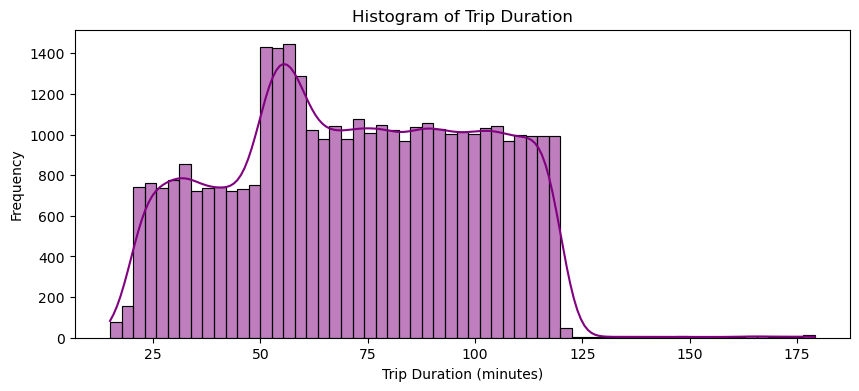

In [117]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert duration to total seconds 
df["tripDuration_minutes"] =  df["tripDuration"].dt.total_seconds() / 60

# Set image size 
plt.figure(figsize=(10, 4))

# Create histogram
histogram = sns.histplot(df["tripDuration_minutes"], kde=True, color="purple")

# Add title and labe
plt.title("Histogram of Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")

In [118]:
# shortest_trip_duration (minutes)
df["tripDuration_minutes"].min()

15.0

In [119]:
# longest_trip_duration (minutes)
df["tripDuration_minutes"].max()

179.05

#### Normality Test

The graphic above showed that the distribution of time durration is not a normal distribution, however, we can further prove it with statistical test.

In [122]:
df["tripDuration_minutes"].count()

36556

Sample size more than 2000 ==> Normality test using **Kolmogorov-Smirnov test**

In [124]:
# import library
from scipy.stats import kstest

# perform normality test
stat, p_value = kstest(df["tripDuration_minutes"], "norm")
print("p-value = ",p_value)

p-value =  nan


p-value = nan
It shows that the distribution is constant/heavily skewed - not a normal distribution.

#### Finding Outliers

In [127]:
# calculate trip duration range
duration_range = df["tripDuration_minutes"].max() - df["tripDuration_minutes"].min() 

Q1 = df["tripDuration_minutes"].quantile(0.25)
Q3 = df["tripDuration_minutes"].quantile(0.75)
IQR = Q3 - Q1

LowerFence = Q1 - 1.5*IQR
UpperFence = Q3 + 1.5*IQR

# finding outliers
outliers_duration = df[(df["tripDuration_minutes"] < LowerFence) | (df["tripDuration_minutes"] > UpperFence)]
outliers_duration


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,payAmount,tripDuration,tapInDay,tapOutDay,tapInDate,tapInHour,tapOutHour,age,ageCategory,tripDuration_minutes
37605,GBFW072V7E05FE,4721230793157234,dki,Safina Lazuardi,M,2008,11C,Rusun Pinus Elok - Rusun Pulo Gebang,0.0,B04898P,...,0.0,0 days 02:42:49,Thursday,Thursday,06,6,8.0,16,adolescent,162.816667
37608,JPVH867T7U10EV,576927814706,flazz,Lili Siregar,M,1982,M1,Blok M - Kota,1.0,P00025,...,3500.0,0 days 02:43:13,Monday,Monday,17,9,12.0,42,adult,163.216667
37614,JYZO216L4Z83XZ,6569508543964383,dki,"Tgk. Hesti Situmorang, M.TI.",F,1996,JAK.75,Cililitan - Kp. Pulo,0.0,B00307P,...,0.0,0 days 02:57:10,Saturday,Saturday,29,8,11.0,28,adult,177.166667
37615,JEES739W6T40LL,3563362178943707,dki,drg. Michelle Puspita,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,...,0.0,0 days 02:43:12,Monday,Tuesday,24,21,0.0,56,adult,163.200000
37616,XLHG339H5Q70WA,6011718497540493,dki,Langgeng Handayani,M,2006,10K,Tanjung Priok - Senen via Taman BMW,1.0,B03729P,...,3500.0,0 days 02:59:03,Sunday,Sunday,23,5,8.0,18,adolescent,179.050000
37619,GMZR235N6X03PL,60427539402,flazz,"Lanang Firmansyah, M.Farm",F,1983,6A,Ragunan - MH Thamrin via Kuningan,1.0,P00121,...,3500.0,0 days 02:56:23,Wednesday,Wednesday,12,13,16.0,41,adult,176.383333
37623,DYHP437D4U26RS,6540723056644645,dki,Tgk. Wani Prasetyo,M,2011,JAK.110A,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B03293P,...,0.0,0 days 02:52:08,Thursday,Thursday,13,7,10.0,13,adolescent,172.133333
37632,ZLGL981L6M64XP,2400990004481721,dki,Cut Ika Narpati,M,1975,4B,Stasiun Manggarai - UI,1.0,B00731P,...,3500.0,0 days 02:46:19,Thursday,Thursday,13,13,16.0,49,adult,166.316667
37633,WBGQ547R3T20AX,501879923123,flazz,Bakianto Mandasari,M,1996,JAK.25,Kp. Rambutan - Kalisari,1.0,B03976P,...,0.0,0 days 02:55:02,Saturday,Saturday,01,19,22.0,28,adult,175.033333
37651,KXDD579U0V88WU,6519634770438502,dki,Zulaikha Suryatmi,M,1991,JAK.25,Kp. Rambutan - Kalisari,0.0,B02936P,...,0.0,0 days 02:57:15,Sunday,Sunday,30,10,13.0,33,adult,177.250000


In [128]:
outlier_count = outliers_duration.count()[0]
outlier_min = outliers_duration["tripDuration_minutes"].min()
outlier_max = outliers_duration["tripDuration_minutes"].max()

print(f"There are {outlier_count} trips that are considered outlier based on its duration, which take between {outlier_min} to {outlier_max} minutes")

There are 39 trips that are considered outlier based on its duration, which take between 162.81666666666666 to 179.05 minutes


The number of outliers is insignificant, so it can be dropped to find the average trip duration.

In [130]:
# removing outlier
threshold = outlier_min
df_without_outlier = df[df["tripDuration_minutes"] < threshold]

After removing the outlier, central tendency can me measured.

#### Central tendency - Mean

In [133]:
tripDuration_mean = df_without_outlier["tripDuration_minutes"].mean().round(2)
print(f"On average, Transjakarta passengers spent {tripDuration_mean} minutes per trip")

On average, Transjakarta passengers spent 72.02 minutes per trip


#### Key Takeaways

* The shortest trip duration = 15 mins
* The longest trip = 179,05 mins or almost 3 hours
* **The average trip duration = 72,02 mins** or around 1 hour and 12 mins

## B. Ridership Pattern

Number of trips (tap in count) on April 2023 : **16.686.971**\
(Source: https://jakarta.bps.go.id/indicator/17/1324/2/jumlah-penumpang-bus-transjakarta-menurut-bulan.html) \
This number indicates the population.

Sample size in this dataset : **37.900** 


### Trip frequency per day

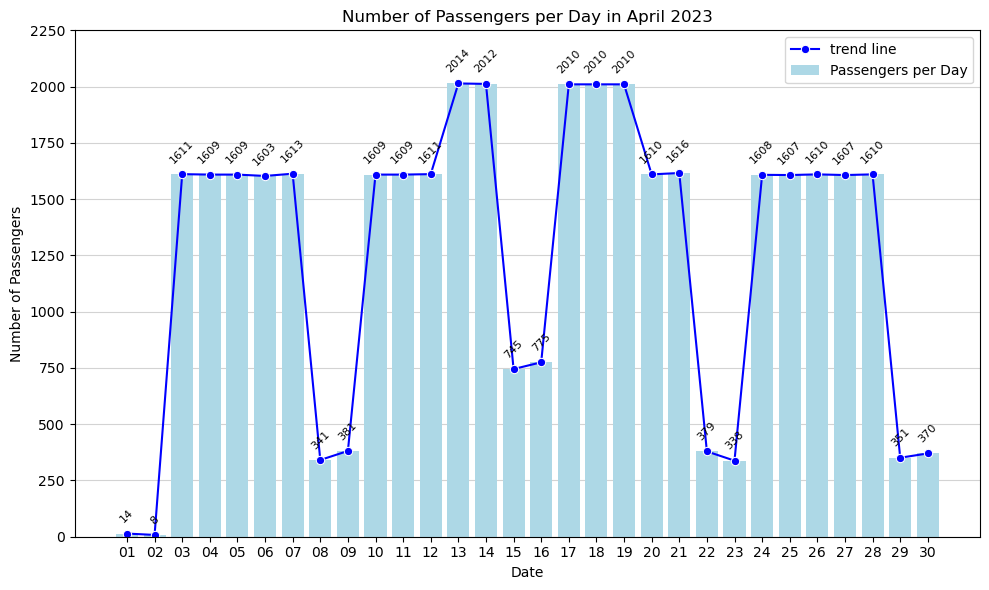

In [139]:
# users count per day
days = df["tapInDate"].unique()
days = sorted(days.tolist())
users_per_day = df.groupby("tapInDate").size()

# set the figure size
plt.figure(figsize=(10,6))

# creating bar chart
bars = plt.bar(days, users_per_day, color="lightblue", label="Passengers per Day", zorder=2)

# adding trend-line
sns.lineplot(
    x = days,
    y = users_per_day,
    ci = 0,
    marker='o', 
    color='b',
    label="trend line",
    estimator=np.sum)  

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Day in April 2023')
plt.xticks(days)
plt.yticks(np.arange(0,2500,250))
plt.legend()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval +40, int(yval), ha='center', va='bottom', fontsize=8, rotation=45)

# Display the plot
plt.grid(True, "major", "y", c="lightgrey", zorder=1)
plt.tight_layout()
plt.show()

* The analysis is conducted to identify overall ridership patterns.
* From the chart above, we can see that the trip counts show variability, with the majority of trips occurring on weekdays and significantly fewer trips on weekends.

### Trip frequency based on days

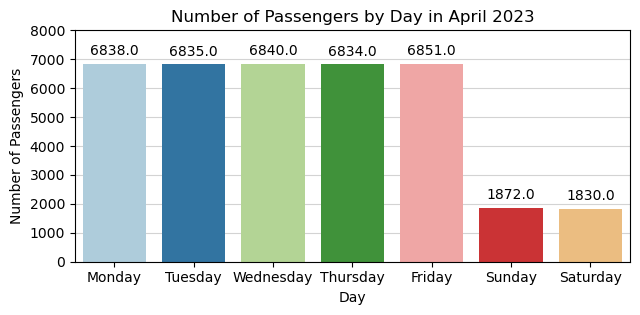

In [142]:
# set the figure size
plt.figure(figsize=(6.5,3.25))

# creating bar chart
bars = sns.countplot(data=df, x="tapInDay", palette="Paired",  zorder=2)

# Adding labels and title
plt.title("Number of Passengers by Day in April 2023")
plt.xlabel("Day")
plt.ylabel("Number of Passengers")
plt.yticks(np.arange(0,9000,1000))
plt.grid(True, "major", "y", c="lightgrey", zorder=1)

# Annotate every bar
for p in bars.patches:  
    bars.annotate(format(p.get_height()),  # Add label according to the y value
    (p.get_x() + p.get_width() / 2., p.get_height()),  # Label in the center of the bar
    ha='center', va='center',  # text positioning
    xytext=(0, 9),  # distace from the bar
    textcoords='offset points')  # text coordinate, relative to the bars

plt.tight_layout()
plt.show()

#### Key Takeaways : 

* On weekdays, the number of passengers remains relatively consistent each day, with no significant differences observed between Monday, Tuesday, Wednesday, and Thursday.
* On weekends, the number of passengers is significantly reduced. The graphic illustrates that weekend ridership is only about 27% of that on weekdays. Additionally, passenger numbers on Saturdays and Sundays are also similar.

* However, in April 2023, there are five Saturdays and five Sundays, and only four of each weekday. Therefore, the numbers do not accurately represent the number of passengers per day. An average number of passengers per day is needed here.
* The graph below shows that, on average, the number of passengers on weekends is only about 21% of the weekday ridership.
* In this analysis, we will focus on weekdays, where the majority of trips occur, as improvements in this area will yield a greater impact.

### Average trip frequency based on days

In [147]:
# users count by days
freq_by_days =  pd.crosstab(index = df["tapInDay"], columns = "trips count")
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
freq_by_days = freq_by_days.reindex(week)
freq_by_days["number of days"] = [4,4,4,4,4,5,5]
freq_by_days["avg passenger per day"] = freq_by_days["trips count"]/freq_by_days["number of days"]
freq_by_days

col_0,trips count,number of days,avg passenger per day
tapInDay,,,
Monday,6838,4,1709.50
Tuesday,6835,4,1708.75
Wednesday,6840,4,1710.00
Thursday,6834,4,1708.50
Friday,6851,4,1712.75
Saturday,1830,5,366.00
Sunday,1872,5,374.40


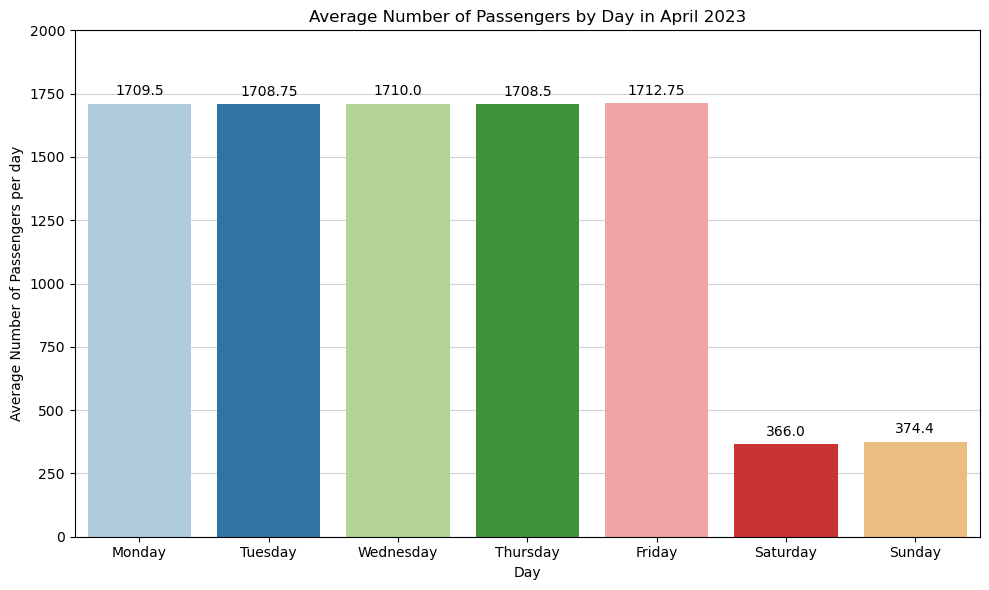

In [148]:
# set the figure size
plt.figure(figsize=(10,6))

# creating bar chart
bars = sns.barplot(data = freq_by_days, x = freq_by_days.index, y = "avg passenger per day", palette="Paired",  zorder=2)

# Adding labels and title
plt.title("Average Number of Passengers by Day in April 2023")
plt.xlabel("Day")
plt.ylabel("Average Number of Passengers per day")
plt.yticks(np.arange(0,2250,250))
plt.grid(True, "major", "y", c="lightgrey", zorder=1)

# Annotate every bar
for p in bars.patches:  
    bars.annotate(format(p.get_height()),  # Add label according to the y value
    (p.get_x() + p.get_width() / 2., p.get_height()),  # Label in the center of the bar
    ha='center', va='center',  # text positioning
    xytext=(0, 9),  # distance from the bar
    textcoords='offset points')  # text coordinate, relative to the bars

plt.tight_layout()
plt.show()

#### Key Takeaways : 

From the chart above, we can see that the average number of passengers per day from this dataset is approximately **1,709 to 1,713** passengers on weekdays, **and 366 to 375** passengers on weekends.

* Further analysis will be done by focusing on  weekdays as it will yield a greater impact.

### Average trip frequency on weekdays based on the hour

As there is a lot of missing data on tap-outs, for the analysis related to tap-outs we have to drop the rows that do not contain any tap-out data.

In [154]:
# clean the missing values
df_tapOut_cleaned = df.dropna(subset=["tapOutTime"])
df_tapOut_cleaned["tapOutHour"] = df_tapOut_cleaned["tapOutHour"].astype(int)
pd.DataFrame(df_tapOut_cleaned["tapOutHour"].value_counts()).sort_values("tapOutHour")

,count
tapOutHour,
0,1
5,1014
6,3449
7,3901
8,2752
9,2727
10,2446
11,1027
12,320


From the table above, we can see that the trips happens mostly between 05:00 and 23:59. There is only 1 trip recorded on between 00:00 and 00:59 in this dataset
* In order to get a more meaningful average, only journeys made between 05:00 and 23:59 are used to calculate the average, as this is when most journeys are made. 

In [156]:
#create stacked chart data
hour = range(0,24)
tapIn_count = []
for i in hour: 
    tapIn_count.append(len(df[df["tapInHour"] == i])/28)

tapOut_count = []
for i in hour: 
    tapOut_count.append(len(df_tapOut_cleaned[df_tapOut_cleaned["tapOutHour"] == i])/28)

data = {"hour":hour, "tapIn":tapIn_count, "tapOut": tapOut_count}
df_tap = pd.DataFrame(data).set_index("hour")
df_tap["total"] = df_tap["tapIn"] + df_tap["tapOut"]

In [157]:
df_tap.loc[(range(5,24))]["total"].mean()

139.953007518797

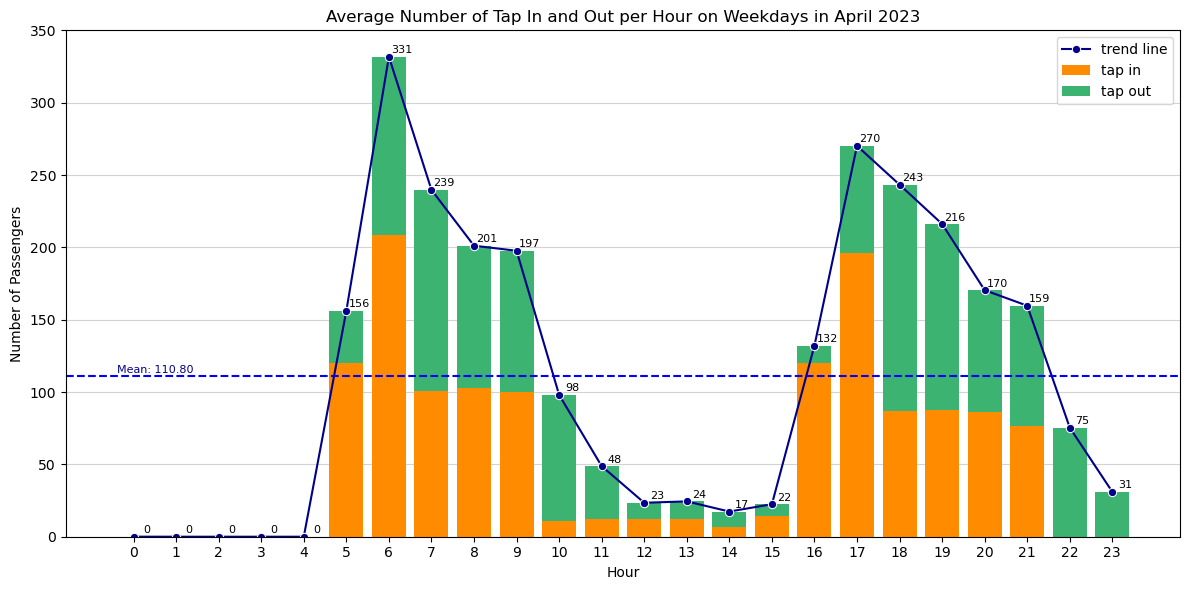

In [158]:
# set the figure size
plt.figure(figsize=(12,6))

# Plot the first set of bars
plt.bar(df_tap.index, df_tap["tapIn"], label='tap in', color="darkorange", zorder=2)
# Plot the second set of bars on top of the first set
plt.bar(df_tap.index, df_tap["tapOut"], bottom=df_tap["tapIn"], label='tap out', color = "mediumseagreen", zorder=2)

# adding trend-line
sns.lineplot(
    x = df_tap.index,
    y = df_tap["total"],
    ci = 0,
    marker='o', 
    color='darkblue',
    label="trend line",
    estimator=np.sum)  
for x, y in zip(df_tap.index, df_tap["total"]):
    plt.text(x = x+0.3, y = y + 1, s=int(y), ha='center', va='bottom', fontsize=8)

# adding mean line
mean = df_tap["total"].mean() 
plt.axhline(mean, color='blue', linestyle='--')

plt.annotate(f'Mean: {mean:.2f}', xy=(0.5, mean), xytext=(0.5, mean + 1),
             ha='center', va='bottom', color='darkblue', fontsize=8)
    
# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
plt.title("Average Number of Tap In and Out per Hour on Weekdays in April 2023")
plt.xticks(df_tap.index)
plt.yticks(np.arange(0, 400, 50))
plt.legend()

plt.grid(True,"major","y",c="lightgray", zorder=1)
   
# Display the plot
plt.tight_layout()
plt.show()

#### Key Takeaways : 

On weekdays, the hour when the number of taps is higher than the average occurs twice a day: between 05:00 and 09:59 and between 16:00 and 21:59. 
This corresponds to the rush hour, when people go to the offices/school in the morning and return home in the afternoon/evening. 

* Further analysis will be done by focusing on busy hours on weekdays as it will yield a greater impact.
* Rush hour is divided into two periods: morning rush hour and evening rush hour.

In [162]:
def is_busy_hour(hour):
    if hour >= 5 and hour < 10:
        return "morning rush hour"
    elif hour >= 16 and hour < 22:
        return "evening rush hour"
    else:
        return "slow hour"
    
df["rush_hours"] = df["tapInHour"].apply(is_busy_hour)
df[["tapInHour","rush_hours"]]

,tapInHour,rush_hours
0,5,morning rush hour
1,5,morning rush hour
2,5,morning rush hour
3,5,morning rush hour
4,6,morning rush hour
...,...,...
37895,18,evening rush hour
37896,21,evening rush hour
37897,10,slow hour
37898,19,evening rush hour


### Ridership Pattern : Corridors

#### The busiest and least busy corridors 

In [165]:
corridor_counts = df["corridorName"].value_counts()

# most & least used corridor
corridor_most_used = corridor_counts.head(5)
corridor_least_used = corridor_counts.tail(5)

In [166]:
# corridors that have the most tap ins:
corridor_most_used

corridorName
Cibubur - Balai Kota                       400
Ciputat - CSW                              388
Pulo Gadung - Monas                        349
Harmoni - Jakarta International Stadium    342
Kebayoran Lama - Tanah Abang               339
Name: count, dtype: int64

In [167]:
# corridors that have the least tap ins:
corridor_least_used

corridorName
Gondangdia - Balai Kota                           41
Senen - Tanah Abang                               41
Term. Pulo Gadung - Lampiri                       31
Tanah Abang - Kebayoran Lama via Pos Pengumben    24
Kampung Rambutan - Blok M                         17
Name: count, dtype: int64

#### Busiest corridors during rush hour

In [170]:
# busiest corridor during morning rush hour
busyCorridor_morning = df[df["rush_hours"] == "morning rush hour"].groupby(["corridorID", "corridorName"]).size().reset_index(name = "count")
busyCorridor_morning = busyCorridor_morning.sort_values(by="count", ascending=False).head()
busyCorridor_morning["avg"] = (busyCorridor_morning["count"]/28).round(3)
busyCorridor_morning

,corridorID,corridorName,count,avg
40,1T,Cibubur - Balai Kota,200,7.143
216,S21,Ciputat - CSW,189,6.750
93,8C,Kebayoran Lama - Tanah Abang,167,5.964
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,163,5.821
120,JAK.06,Kampung Rambutan - Pondok Gede,163,5.821


In [171]:
# busiest corridor during evening rush hour
busyCorridor_evening = df[df["rush_hours"] == "evening rush hour"].groupby(["corridorID", "corridorName"]).size().reset_index(name = "count")
busyCorridor_evening = busyCorridor_evening.sort_values(by="count", ascending=False).head()
busyCorridor_evening["avg"] = (busyCorridor_evening["count"]/28).round(3)
busyCorridor_evening

,corridorID,corridorName,count,avg
40,1T,Cibubur - Balai Kota,195,6.964
216,S21,Ciputat - CSW,183,6.536
196,JIS3,Harmoni - Jakarta International Stadium,171,6.107
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,164,5.857
120,JAK.06,Kampung Rambutan - Pondok Gede,164,5.857


#### **Ratio Estimation Method for Scaling Up**


For the analysis scaling-up method is used. This is done by using the sample mean to estimate the total tap-ins for the entire population.\
This involves multiplying the sample mean by the ratio of the total population size to the sample size.

##### <font color='Blue'> Estimated Population Average = (Sample mean) * (Population Size/Sample Size) </font>

**This analysis is based on the assumption that the sample is random and unbiased.**

* Sample size : **37,900** (number of rows in this dataset)
* Population size : **16,686,971** (number of all transactions on April 2023) \
(Source: https://jakarta.bps.go.id/indicator/17/1324/2/jumlah-penumpang-bus-transjakarta-menurut-bulan.html)

### Analysis on the busiest corridor : Ciputat - Balai Kota (1T)

In [179]:
from IPython.display import Image, display

# Image URL
image_url = "https://smk.transjakarta.co.id/aset/berkas/rute/115486-20230529161951-1685351991_b66ed58d978dcf0eec4d.jpg"

# Display the image
display(Image(url=image_url, width=400))

In [180]:
# define ratio estimate formula for scaling up
def ratio_est(sample_count):
    avg_pop = sample_count * (16686971/37900) / 28 #avg sampe times the population size divided by sample size, divided by 28 (weekdays) to find the daily average '
    return avg_pop

In [181]:
df_1T = df[df["corridorID"]=="1T"]
hour = range(0,24)

# counting the number of tap ins in each hour
freq_1T = []
for i in hour: 
   freq_1T.append(len(df_1T[df_1T["tapInHour"] == i]))

# scaling up to get the estimate number of tap ins in each hour
freq_1T_hourly = []
for i in freq_1T:
    freq_1T_hourly.append(ratio_est(i))

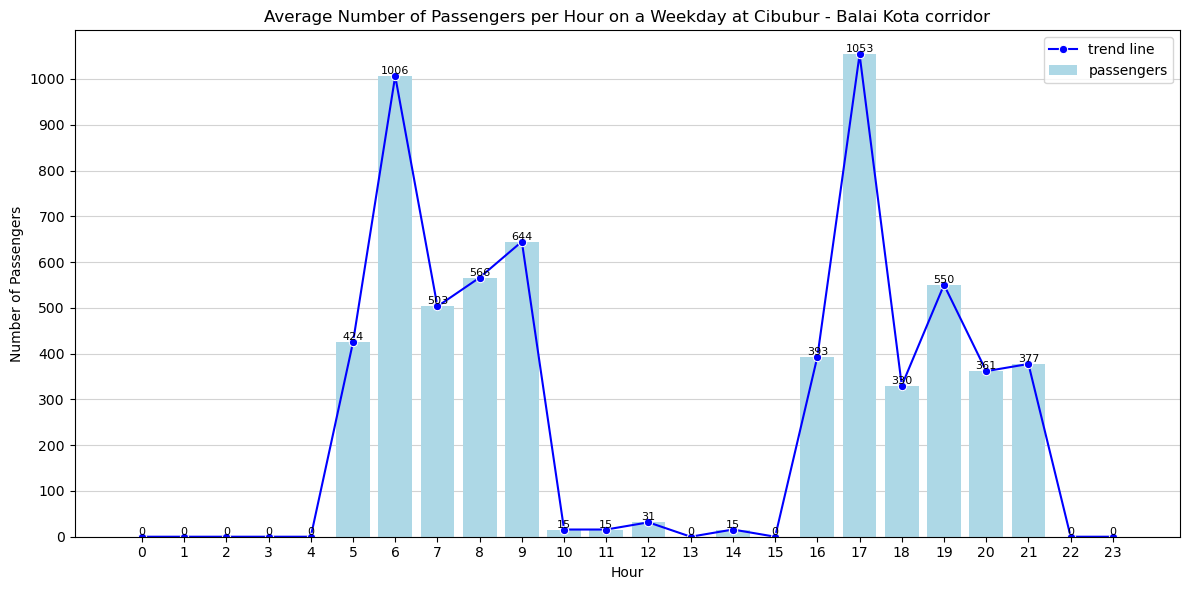

In [182]:
# set the figure size
plt.figure(figsize=(12,6))

# Plot the first set of bars
plt.bar(hour, freq_1T_hourly, label='passengers', color="lightblue", zorder=2)


# adding trend-line
sns.lineplot(
    x = hour,
    y =  freq_1T_hourly,
    ci = 0,
    marker='o', 
    color='blue',
    label="trend line",
    estimator=np.sum)  
for x, y in zip(hour, freq_1T_hourly):
    plt.text(x = x, y = y, s=int(y), ha='center', va='bottom', fontsize=8)

    
# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
plt.title("Average Number of Passengers per Hour on a Weekday at Cibubur - Balai Kota corridor")
plt.xticks(hour)
plt.yticks(np.arange(0, 1100,100))
plt.legend()

plt.grid(True,"major","y",c="lightgray", zorder=1)
   
# Display the plot
plt.tight_layout()
plt.show()

#### Key Takeaways : 

By mapping passengers at each hour in each corridor, it is possible to see how many fleets are needed to serve those passengers to avoid overcrowding and long waits. 

* Corridor 1T belongs to the Royal Trans category: it focuses on transporting passengers from residential areas to and from the centre of Jakarta.
* During the busiy hours, the number of passengers ranges from 330 to 644. However, between 06:00 - 06:59 and 17:00 - 17:59 there are peaks of 1006 and 1053 passengers respectively. 
* Corridor 1T buses have seating capacity of 30 benches (source: https://ayonaikbis.com/royaltrans-untuk-jakarta/4364#).

With these numbers we can calculate how many buses are needed per hour. \
**Note** : If there are no passengers, it is assumed that the bus comes once an hour.  

In [187]:
import math

# how many bus should run in an hour (.... bus per hour)
bus_per_hour = []
for i in freq_1T_hourly: 
   bus_per_hour.append(math.ceil(i/30))


# how often the bus should run in this coridor (1 bus every .... minutes)
bus_frequency = []

def convert_seconds_to_min_sec(seconds):
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    return f"{int(minutes)} min {int(remaining_seconds)} sec"
    
for i in bus_per_hour: 
    if i != 0 :
        x = convert_seconds_to_min_sec(3600/i)
        bus_frequency.append(x)
    else: 
        x = "60 min 0 sec" # ketika tidak ada penumpang maka diasumsikan bus datang 1x dalam satu jam  
        bus_frequency.append(x)
        
df_1T_bus = pd.DataFrame({"hour":hour, "bus/hour": bus_per_hour, "frequency (minutes)": bus_frequency})
df_1T_bus = df_1T_bus.set_index("hour")
df_1T_bus 

,bus/hour,frequency (minutes)
hour,,
0,0,60 min 0 sec
1,0,60 min 0 sec
2,0,60 min 0 sec
3,0,60 min 0 sec
4,0,60 min 0 sec
5,15,4 min 0 sec
6,34,1 min 45 sec
7,17,3 min 31 sec
8,19,3 min 9 sec


#### Key Takeaways : 

From the table above we can see that corridor 1T has the highest number of taps in the morning and evening peak hours. \
This analysis can also be carried out for other corridors to determine the number of fleets required for each corridor. 
 
**At peak times, it is estimated that ideally 1 bus should depart every 1 minute 40 seconds** (e.g. at 6am and 5pm) to avoid passengers crowding at Transjakarta bus stops. \
This is difficult to achieve because it takes time for passengers to get on and off the bus. The solution is to increase the bus capacity at these peak times.
For example, if the bus capacity at 6 o'clock is 90 (for example with double buses) - then the frequency of buses can be every 5 minutes during peak hours. 
Another possibility is to increase the capacity of bus stops, so that the waiting capacity is greater / more buses can stop at the same time to pick up / drop off passengers. For this it is necessary to know which bus stops are the busiest, based on the number of entries and exits.

The next analysis will be done to find out the busiest Transjakarta stops 

### Ridership pattern : tap-in and tap-out stops

#### Taps in and out counts

In [193]:
# average tap ins per day by hour - on weekdays 
tapIn_freq_by_hour = (df[(df["tapInDay"] != "Saturday") & (df["tapInDay"] != "Sunday")][["tapInHour", "transID"]].pivot_table(index = ["tapInHour"], aggfunc="count"))
tapIn_freq_by_hour["avg"] = (tapIn_freq_by_hour["transID"]/28).round(2) #there are in total 28 weekdays in April 2023

In [194]:
# average tap outss per day by hour - on weekdays 
tapOut_freq_by_hour = (df_tapOut_cleaned[(df_tapOut_cleaned["tapOutDay"] != "Saturday") & (df_tapOut_cleaned["tapOutDay"] != "Sunday")][["tapOutHour", "transID"]].pivot_table(index = ["tapOutHour"], aggfunc="count"))
tapOut_freq_by_hour["avg"] = (tapOut_freq_by_hour["transID"]/28).round(2) #there are in total 28 weekdays in April 2023

In [195]:
freq_by_hour = [tapIn_freq_by_hour, tapOut_freq_by_hour]
chart_color = ["darkorange", "mediumseagreen"]
title = ["Average Number of Tap In per Hour on a Weekday in April 2023", "Average Number of Tap Out per Hour on a Weekday in April 2023"]

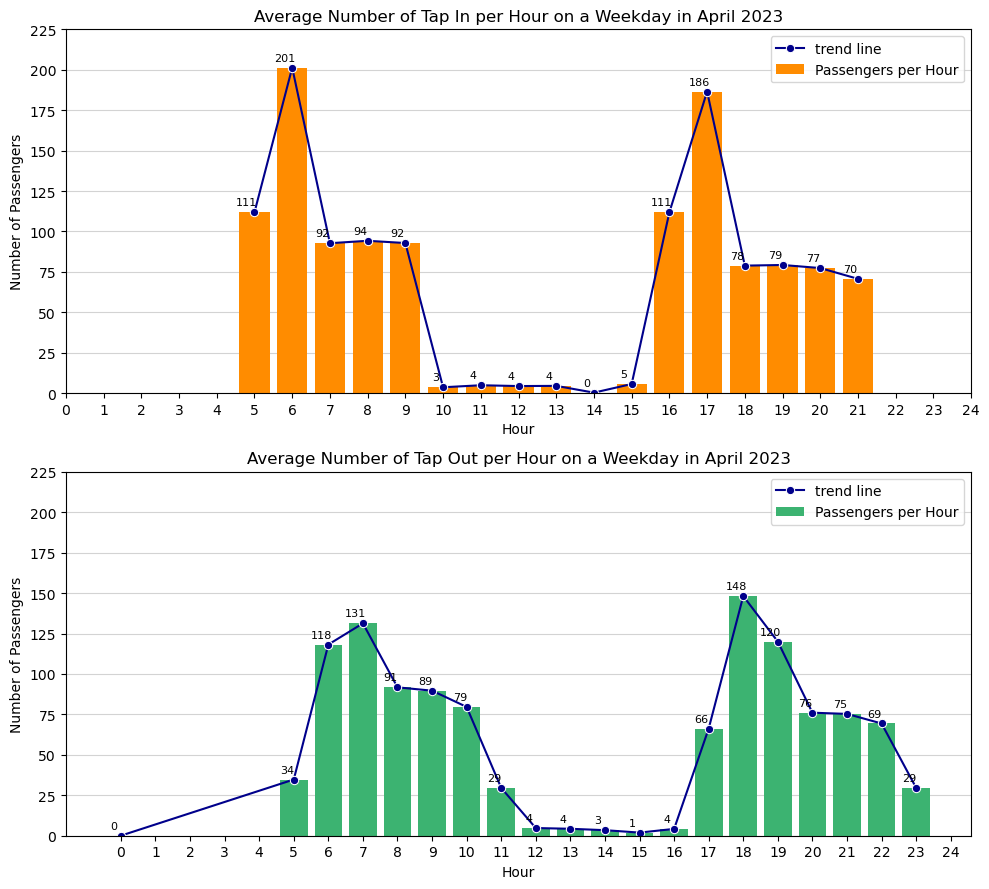

In [196]:
# set the figure size
plt.figure(figsize=(10,9))

# create chart
for i in range(2):
    plt.subplot(2, 1, i+1) # 2 rows, 1 column, 1st chart
    # creating bar chart
    tapIn_bars = plt.bar(freq_by_hour[i].index, freq_by_hour[i]["avg"], color=chart_color[i], label="Passengers per Hour", zorder=2)
    
    # adding trend-line
    sns.lineplot(
        x = freq_by_hour[i].index,
        y = freq_by_hour[i]["avg"],
        ci = 0,
        marker='o', 
        color='darkblue',
        label="trend line",
        estimator=np.sum)  
    
    # Adding labels and title
    plt.xlabel('Hour')
    plt.ylabel('Number of Passengers')
    plt.title(title[i])
    plt.xticks(np.arange(0, 25, 1))
    plt.yticks(np.arange(0, 250, 25))
    plt.legend()
    for bar in tapIn_bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.2, yval +3, int(yval), ha='center', va='bottom', fontsize=8)
    plt.grid(True,"major","y",c="lightgray", zorder=1)

# Display the plot
plt.tight_layout()
plt.show()

#### Key Takeaways : 

From the chart above, both tap in and tap hour follow a similar pattern. \
there is a spike in passengers tapping in between **05:00 and 09:59** and tapping out between **06:00 and 10:59** in the morning \
another surge of passengers tapping in between **16:00 and 21:59** and tapping out between **17:00 and 22:59** in the evening 

* There is a difference of one hour between spikes in tap ins and tap outs.
* The next step is to see which corridors and stops are the busiest at peak times.

#### Busiest stops

In [200]:
# There is a difference of one hour between spikes in tap ins and tap outs.
tapIn_busyHour_morning =  np.arange(5,10,1)
tapOut_busyHour_morning =  tapIn_busyHour_morning + [1]

tapIn_busyHour_evening =    np.arange(16,22,1)
tapOut_busyHour_evening =  tapIn_busyHour_evening + [1]

In [201]:
# determine if the tap in hour is busy hour
def is_TapIn_busy(hour):
    if hour in tapIn_busyHour_morning:
        return "busy morning Tap In"
    elif hour in tapIn_busyHour_evening:
        return "busy evening Tap In"
    else:
        return "slow Tap In"
    
df["busy_tapIn"] = df["tapInHour"].apply(is_TapIn_busy)

def is_TapOut_busy(hour):
    if hour in tapOut_busyHour_morning:
        return "busy morning Tap Out"
    elif hour in tapOut_busyHour_evening:
        return "busy evening Tap Out"
    else:
        return "slow Tap Out"

# add into Data Frame
df["busy_tapIn"] = df["tapInHour"].apply(is_TapIn_busy)
df["busy_tapOut"] = df["tapOutHour"].apply(is_TapOut_busy)

In [202]:
# busiest tap in stops at morning rush hours
busyTapIn_morning = df[df["busy_tapIn"] == "busy morning Tap In"].groupby(["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]).size().reset_index(name = "count")
busyTapIn_morning = busyTapIn_morning.sort_values(by="count", ascending= False).reset_index()
busyTapIn_morning.head()

,index,tapInStopsName,tapInStopsLat,tapInStopsLon,count
0,168,Garuda Taman Mini,-6.290154,106.88116,143
1,861,Rusun Kapuk Muara,-6.135667,106.76299,104
2,691,Penjaringan,-6.126306,106.79203,91
3,841,Rawa Selatan,-6.173925,106.85809,85
4,1298,Tendean,-6.240213,106.83102,84


In [203]:
# busiest tap out stops at morning rush hours
busyTapOut_morning = df[df["busy_tapOut"] == "busy morning Tap Out"].groupby(["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]).size().reset_index(name = "count")
busyTapOut_morning = busyTapOut_morning.sort_values(by="count", ascending= False).reset_index()
busyTapOut_morning.head()

,index,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,count
0,592,Penjaringan,-6.126306,106.79203,151
1,21,BKN,-6.257751,106.87000,138
2,535,Monas,-6.176248,106.82286,128
3,426,Kejaksaan Agung,-6.240500,106.79844,93
4,63,Bundaran Senayan 1,-6.227445,106.80187,87


In [204]:
# busiest tap in stops at evening rush hours
busyTapIn_evening = df[df["busy_tapIn"] == "busy evening Tap In"].groupby(["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]).size().reset_index(name = "count")
busyTapIn_evening = busyTapIn_evening.sort_values(by="count", ascending= False).reset_index()
busyTapIn_evening.head()

,index,tapInStopsName,tapInStopsLat,tapInStopsLon,count
0,740,Penjaringan,-6.126306,106.792030,144
1,106,Cibubur Junction,-6.368735,106.893660,108
2,727,Pejaten,-6.278404,106.829720,102
3,21,BKN,-6.257751,106.870000,101
4,26,BNN LRT,-6.245863,106.871143,86


In [205]:
# busiest tap out stops at evening rush hour
busyTapOut_evening = df[df["busy_tapOut"] == "busy evening Tap Out"].groupby(["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]).size().reset_index(name = "count")
busyTapOut_evening = busyTapOut_evening.sort_values(by="count", ascending= False).reset_index()
busyTapOut_evening.head()

,index,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,count
0,22,BKN,-6.257751,106.87000,144
1,1208,Term. Senen,-6.173560,106.84213,141
2,653,Pinang Ranti,-6.291075,106.88634,113
3,1199,Term. Kampung Rambutan,-6.308964,106.88165,99
4,796,Rusun Kapuk Muara,-6.135667,106.76299,95


#### Key Takeaways : 

The tables above show which bus stops are full at peak times.
* busiest tap in stop at morning rush hour : **Garuda Taman Mini**, with 143 recorded tap ins
* busiest tap out stop at morning rush hour : **Penjaringan**, with 151 recorded tap ins
* busiest tap in stop at evening rush hour : **Penjaringan**, with 144 recorded tap outs
* busiest tap out stop at evening rush hour : **BKN**, with 144 recorded tap outs. 

Using the scaling method mentioned above, we can estimate the number of passengers at each bus stop at each hour. 

### Analysis on the busiest stop : Penjaringan

The analysis was conducted at Pejaringan bus stop, which is one of the busiest bus stops on the Transjakarta line.
The same method of analysis can be done at other bus stops to get similar insights.

In [211]:
# create new dataframe contains trips on weekdays and stops at Penjaringan
df_penjaringan = df[(df["tapInDay"]!="Saturday") &( df["tapInDay"]!="Sunday") & ((df["tapInStopsName"]=="Penjaringan") | (df["tapOutStopsName"]=="Penjaringan"))]

# count the tap ins and outs
tapIn = pd.crosstab(index = df_penjaringan["tapInHour"], columns = "count")
tapIn.index.name = "hour"
tapOut = pd.crosstab(index = df_penjaringan["tapOutHour"], columns = "count")
tapOut.index.name = "hour"

In [212]:
#combined the tap counts
tap_count = pd.merge(tapIn, tapOut, on="hour", how="outer")
tap_count.fillna(0, inplace=True)

by scaling up, we can find the average number of taps in and out per day 
* divided by 28 (number of weekdays) to get the daily average 
* times the population size divided by the sample size

In [214]:
# define ratio estimate formula for scaling up
def ratio_est(sample_count):
    avg_pop = sample_count * (16686971/37900) / 28 #avg sampe times the population size divided by sample size, divided by 28 (weekdays) to find the daily average '
    return avg_pop
# apply ratio estimate formula to tap in and tap out counts
tap_count["count_x"] = tap_count["count_x"].apply(ratio_est).round(2)
tap_count["count_y"] = tap_count["count_y"].apply(ratio_est).round(2)
tap_count = tap_count.rename(columns={"count_x": "tap ins", "count_y": "tap outs"})
tap_count = tap_count.reset_index()

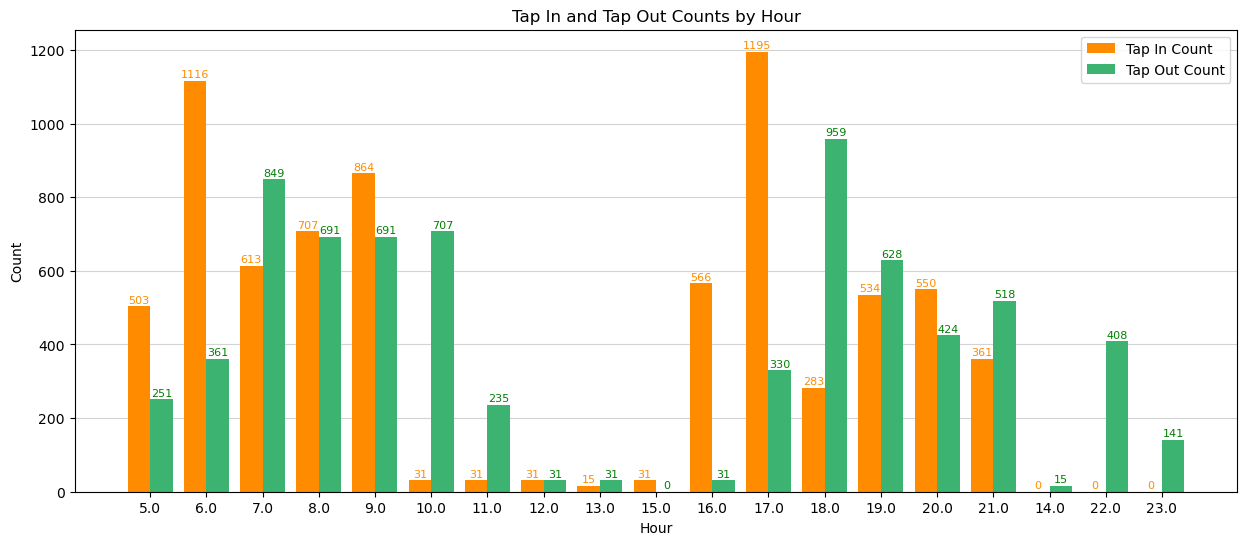

In [215]:
bar_width = 0.4
r1 = range(len(tap_count["hour"]))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(15,6))
tapIn = plt.bar(r1, tap_count["tap ins"], color="darkorange", width=bar_width, edgecolor=None, label='Tap In Count', zorder = 2)
tapOut = plt.bar(r2, tap_count["tap outs"], color="mediumseagreen", width=bar_width, edgecolor=None, label='Tap Out Count', zorder = 2)

# Add ticks and grid
plt.xlabel('Hour')
plt.xticks([r + bar_width / 2 for r in range(len(tap_count['hour']))], tap_count['hour'])
plt.grid(axis='y', zorder = 1)

# Add labels and title
plt.ylabel('Count')
plt.title('Tap In and Tap Out Counts by Hour')
plt.legend()

for bar in tapIn:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval +3, int(yval), ha='center', va='bottom', fontsize=8,  color="darkorange")
plt.grid(True,"major","y",c="lightgray", zorder=1)

for bar in tapOut:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval +3, int(yval), ha='center', va='bottom', fontsize=8, color="green")
plt.grid(True,"major","y",c="lightgray", zorder=1)

# Display the bar chart
plt.show()

In [216]:
# total tap ins per day at Penjaringan (on weekdays)
a = tap_count["tap ins"].sum().round(2)

# highest tap ins count by hour per day at Penjaringan (on weekdays)
b = tap_count["tap ins"].max()
c = int(tap_count.loc[tap_count["tap ins"] == b]["hour"])

print(f"There is an estimation of {a} total tap ins on a typical weekday , with a peak count of {b} which happens between {c}:00 and {c}:59")

There is an estimation of 7437.75 total tap ins on a typical weekday , with a peak count of 1195.07 which happens between 17:00 and 17:59


In [217]:
# total tap outs per day at Penjaringan (on weekdays)
d = tap_count["tap outs"].sum().round(2)

# highest tap ins count by hour per day at Penjaringan (on weekdays)
e = tap_count["tap outs"].max()
f = int(tap_count.loc[tap_count["tap outs"] == e]["hour"])

print(f"There is an estimation of {d} total tap outs on a typical weekday , with a peak count of {e} which happens between {f}:00 and {f}:59")

There is an estimation of 7311.93 total tap outs on a typical weekday , with a peak count of 959.2 which happens between 18:00 and 18:59


In [218]:
# koridor dari penumpang yang tap in atau tap out di halte Penjaringan
df_penjaringan[["corridorID", "corridorName"]].value_counts()

corridorID  corridorName                        
3C          Rusun Kapuk Muara - Penjaringan         229
12H         Rusun Penjaringan - Penjaringan         127
12          Tanjung Priok - Pluit                    60
9           Pinang Ranti - Pluit                     25
M12         Sunter Boulevard Barat - Penjaringan     20
M9          Pinang Ranti - Pluit                      5
Name: count, dtype: int64

#### Key Takeaways : 

There are an estimated around 14700 total taps on a typical weekday at Perjaringan bus stop, \
with a peak of 1195 tap ins and 960 tap outs per hour occurring at evening rush hours. 

**Bus stop capacity**
* Assuming that the bus arrives every 3 minutes during the peak hour and that the capacity of the bus is 30 passengers, and assuming that passengers arrive according to the bus departure time, then 600 passengers can be transported in 1 hour. Then the Penjaringan bus stop needs a waiting area that can accommodate about 560 passengers to prevent passengers from crowding at the bus stop.

* If we assume that the bus comes every 2 minutes in the peak hour and the bus capacity is 30 passengers, then the Penjaringan bus stop needs a waiting area that can accommodate about 260 passengers. 

* With the estimation of 1195 tap ins and 960 tap outs, we can roughly say that there are around 20 people coming in the bus stop and tapping in and 16 people coming out of the bus stop tapping out each minute. The figure calculated above can also be used to make decisions about the size of the bus stop, the width of the lanes entering and exiting the bus stop, and the number of turnstiles at the bus stop. 

### Geographical mapping of the busiest Transjakarta stops

#### During the morning rush hour

In [223]:
# 10 busiest tap in stops in the morning
import folium
# create a map
mymap = folium.Map(location=(-6.175189728763669, 106.82716352627924), zoom_start=11)
tapIn_lat = busyTapIn_morning["tapInStopsLat"]
tapIn_lon = busyTapIn_morning["tapInStopsLon"]
tapIn_stop_name = busyTapIn_morning["tapInStopsName"]

tapOut_lat = busyTapOut_morning["tapOutStopsLat"]
tapOut_lon = busyTapOut_morning["tapOutStopsLon"]
tapOut_stop_name = busyTapOut_morning["tapOutStopsName"]

# Add markers
for i in range(0,11): 
    folium.Marker(
        location = [tapIn_lat[i], tapIn_lon[i]], 
        popup = f"tapIn: {tapIn_stop_name[i]}",
        icon = folium.Icon(color = "blue")
    ).add_to(mymap)

for j in range(0,11): 
    folium.Marker(
        location = [tapOut_lat[j], tapOut_lon[j]], 
        popup = f"tapOut: {tapOut_stop_name[j]}",
        icon = folium.Icon(color = "red")
    ).add_to(mymap)
# Display the map
mymap

In [224]:
busyTapIn_morning

,index,tapInStopsName,tapInStopsLat,tapInStopsLon,count
0,168,Garuda Taman Mini,-6.290154,106.88116,143
1,861,Rusun Kapuk Muara,-6.135667,106.76299,104
2,691,Penjaringan,-6.126306,106.79203,91
3,841,Rawa Selatan,-6.173925,106.85809,85
4,1298,Tendean,-6.240213,106.83102,84
...,...,...,...,...,...
1350,903,SDN Sunter Agung 09,-6.127638,106.85898,1
1351,904,SMA Kartika,-6.260596,106.75896,1
1352,906,SMAN 24,-6.210598,106.79631,1
1353,907,SMAN 28,-6.286109,106.83318,1


#### During the evening rush hour

In [226]:
# 10 busiest tap in stops in the morning
import folium
# create a map
mymap = folium.Map(location=(-6.175189728763669, 106.82716352627924), zoom_start=11)
tapIn_lat = busyTapIn_evening["tapInStopsLat"]
tapIn_lon = busyTapIn_evening["tapInStopsLon"]
tapIn_stop_name = busyTapIn_evening["tapInStopsName"]

tapOut_lat = busyTapOut_evening["tapOutStopsLat"]
tapOut_lon = busyTapOut_evening["tapOutStopsLon"]
tapOut_stop_name = busyTapOut_evening["tapOutStopsName"]

# Add markers
for i in range(0,6): 
    folium.Marker(
        location = [tapIn_lat[i], tapIn_lon[i]], 
        popup = f"tapIn: {tapIn_stop_name[i]}",
        icon = folium.Icon(color = "blue")
    ).add_to(mymap)

for j in range(0,6): 
    folium.Marker(
        location = [tapOut_lat[j], tapOut_lon[j]], 
        popup = f"tapOut: {tapOut_stop_name[j]}",
        icon = folium.Icon(color = "red")
    ).add_to(mymap)
# Display the map
mymap

## C. Passengers demographic

In [228]:
# create a table to categorize and count passengers based on age group and gender.
grouped = df.groupby(["corridorID", "payCardSex", "ageCategory"]).size().reset_index(name="count")
demographic_count = grouped.pivot_table(index="corridorID", columns=["ageCategory", "payCardSex"], values="count", fill_value=0)
sum_row = demographic_count.sum(axis=0).to_frame().T
sum_row.index = ["Total"]

demographic_count = pd.concat([demographic_count, sum_row])
demographic_count

ageCategory children        adolescent            adult          elderly  \
payCardSex         F      M          F       M        F        M       F   
1                0.0    0.0       36.0    39.0      5.0    155.0     0.0   
10               1.0    0.0       14.0     1.0     11.0     73.0     0.0   
10A              0.0    0.0        4.0     1.0     85.0     58.0     0.0   
10B              0.0    0.0       15.0     0.0     81.0     44.0     0.0   
10D              0.0    0.0       41.0     0.0     42.0     44.0     0.0   
...              ...    ...        ...     ...      ...      ...     ...   
S22              0.0    0.0        1.0    39.0      9.0     85.0     0.0   
S31              0.0    0.0        0.0     1.0    102.0     48.0     0.0   
T11              0.0    0.0       92.0     1.0    124.0     43.0     0.0   
T21              0.0    0.0        1.0    39.0     57.0     82.0     0.0   
Total          622.0  155.0     3258.0  1909.0  15564.0  14453.0    94.0   

ageCategory         
payCardSex       M  
1              1.0  
10             1.0  
10A            0.0  
10B            0.0  
10D           39.0  
...            ...  
S22            2.0  
S31            0.0  
T11            0.0  
T21            0.0  
Total        720.0  

[222 rows x 8 columns]

In [229]:
# create a normalized table to calculate the percentage
demographic_count_norm = demographic_count.div(demographic_count.sum(axis=1), axis=0) * 100
demographic_count_norm

ageCategory  children           adolescent                 adult             \
payCardSex          F         M          F          M          F          M   
1            0.000000  0.000000  15.254237  16.525424   2.118644  65.677966   
10           0.990099  0.000000  13.861386   0.990099  10.891089  72.277228   
10A          0.000000  0.000000   2.702703   0.675676  57.432432  39.189189   
10B          0.000000  0.000000  10.714286   0.000000  57.857143  31.428571   
10D          0.000000  0.000000  24.698795   0.000000  25.301205  26.506024   
...               ...       ...        ...        ...        ...        ...   
S22          0.000000  0.000000   0.735294  28.676471   6.617647  62.500000   
S31          0.000000  0.000000   0.000000   0.662252  67.549669  31.788079   
T11          0.000000  0.000000  35.384615   0.384615  47.692308  16.538462   
T21          0.000000  0.000000   0.558659  21.787709  31.843575  45.810056   
Total        1.691366  0.421482   8.859279   5.191027  42.322230  39.301156   

ageCategory   elderly             
payCardSex          F          M  
1            0.000000   0.423729  
10           0.000000   0.990099  
10A          0.000000   0.000000  
10B          0.000000   0.000000  
10D          0.000000  23.493976  
...               ...        ...  
S22          0.000000   1.470588  
S31          0.000000   0.000000  
T11          0.000000   0.000000  
T21          0.000000   0.000000  
Total        0.255608   1.957852  

[222 rows x 8 columns]

In [230]:
children_percentage = demographic_count_norm["children"].loc["Total"].sum()
adolescent_percentage = demographic_count_norm["adolescent"].loc["Total"].sum()
adult_percentage = demographic_count_norm["adult"].loc["Total"].sum()
elderly_percentage = demographic_count_norm["elderly"].loc["Total"].sum()

print(f"Passenger demographic (based on age group): \n" 
f"children \t: {children_percentage.round(2)}%\n" 
f"adolescent \t: {adolescent_percentage.round(2)}%\n"
f"adult \t\t: {adult_percentage.round(2)}&\n"
f"elderly \t: {elderly_percentage.round(2)}%"
     )

Passenger demographic (based on age group): 
children 	: 2.11%
adolescent 	: 14.05%
adult 		: 81.62&
elderly 	: 2.21%


In [231]:
female_percentage = demographic_count_norm[("children", "F")].loc["Total"] + demographic_count_norm[("adolescent", "F")].loc["Total"] + demographic_count_norm[("adult", "F")].loc["Total"] + demographic_count_norm[("elderly", "F")].loc["Total"]
male_percentage = demographic_count_norm[("children", "M")].loc["Total"] + demographic_count_norm[("adolescent", "M")].loc["Total"] + demographic_count_norm[("adult", "M")].loc["Total"] + demographic_count_norm[("elderly", "M")].loc["Total"]

print(f"Passenger demographic (based on gender): \n" 
f"female \t: {female_percentage.round(2)}%\n" 
f"male \t: {male_percentage.round(2)}%\n")

Passenger demographic (based on gender): 
female 	: 53.13%
male 	: 46.87%



In [232]:
# finding out travel pattern of each gender (by hour)
df_gender = df[["tapInHour", "payCardSex"]].groupby(["tapInHour", "payCardSex"]).size().reset_index(name="count")
df_gender = df_gender.pivot_table(index="tapInHour", columns=["payCardSex"], values="count", fill_value=0)

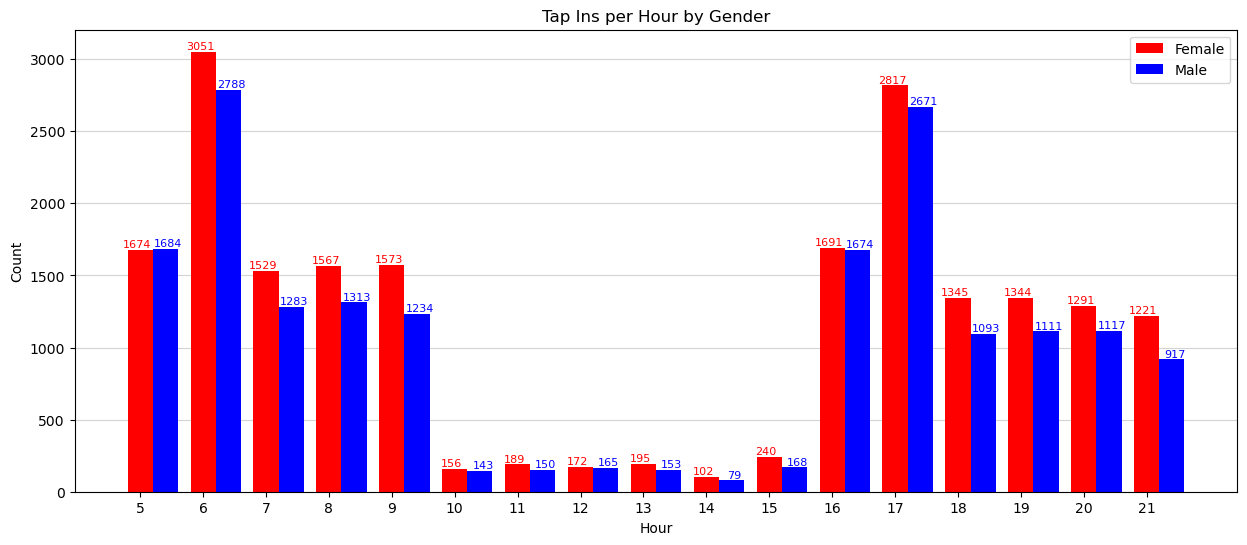

In [233]:
bar_width = 0.4
r1 = df_gender.index
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(15,6))
female = plt.bar(r1, df_gender["F"], color="red", width=bar_width, edgecolor=None, label="Female", zorder = 2)
male = plt.bar(r2, df_gender["M"], color="blue", width=bar_width, edgecolor=None, label="Male", zorder = 2)

# Add ticks and grid
plt.xlabel('Hour')
plt.xticks(range(5,22), )
plt.grid(axis='y', zorder = 1)

# Add labels and title
plt.ylabel('Count')
plt.title('Tap Ins per Hour by Gender')
plt.legend()

for bar in female:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.15, yval +3, int(yval), ha='center', va='bottom', fontsize=8,  color="red")
plt.grid(True,"major","y",c="lightgray", zorder=1)

for bar in male:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval +3, int(yval), ha='center', va='bottom', fontsize=8, color="blue")
plt.grid(True,"major","y",c="lightgray", zorder=1)

# Display the bar chart
plt.show()

#### Key Takeaways : 

* Although not very different, there are generally more women than men at busy times.
* Male and female follow the same travel pattern, most of them are traveling during the morning and evening busy hours
* Considering that there are more women than men and that many cases of sexual harassment have occurred in Transjakarta, it is desirable to add more women-only buses and seats or expand the women-only waiting area to ensure their safety. Especially during the morning and evening rush hours, which are usually very crowded.
(Source: https://www.kompas.com/properti/read/2023/03/02/163000421/transjakarta-perluas-jangkauan-bus-pink-khusus-wanita-cek-di-sini)

#### ELderly

In [237]:
# filtering the data
df_elderly_age = df[df["ageCategory"]=="elderly"].groupby(["age"]).size().reset_index(name="count")

Maximum retiring age in Indonesia is 65 year
(Source : https://databoks.katadata.co.id/datapublish/2023/05/26/ini-perbandingan-usia-pensiun-indonesia-dan-negara-g20-mana-yang-tertua)

In [239]:
# finding out the number and percentage of elderly
number_of_elderly = df_elderly_age["count"].sum()
working_elderly = df_elderly_age[df_elderly_age["age"] > 65]["count"].sum()
working_elderly_percentage = (working_elderly/number_of_elderly)*100
retiring_elderly = df_elderly_age[df_elderly_age["age"] <= 65]["count"].sum()
retiring_elderly_percentage = (retiring_elderly/number_of_elderly)*100

print(
    f"There are {number_of_elderly} elderly in the sample,\n"
    f"{working_elderly} people or {working_elderly_percentage.round(2)}% are within maximum working age, and \n"
    f"{retiring_elderly} people or {retiring_elderly_percentage.round(2)}% are within retirement age"
    )

There are 838 elderly in the sample,
495 people or 59.07% are within maximum working age, and 
343 people or 40.93% are within retirement age


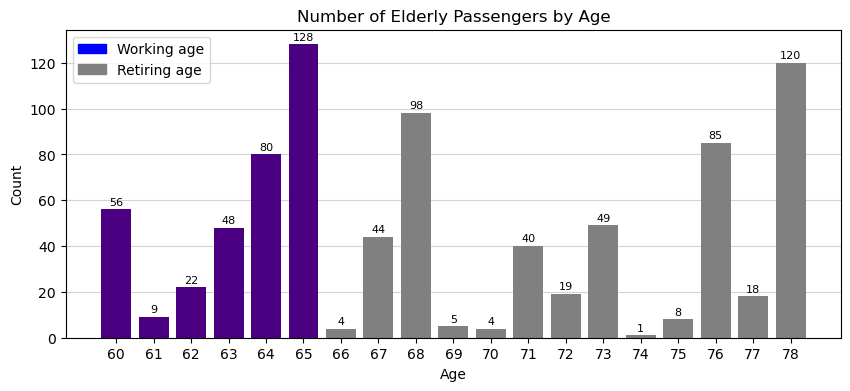

In [240]:
import matplotlib.patches as mpatches

colors = ["indigo" if age <= 65 else "grey" for age in df_elderly_age["age"]]
plt.figure(figsize=(10, 4))
elderly = plt.bar(df_elderly_age["age"], df_elderly_age["count"], color=colors, zorder = 2)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Number of Elderly Passengers by Age")
plt.grid(True, "major", "y", zorder = 1)
plt.xticks(df_elderly_age["age"])

# Create custom legend
blue_patch = mpatches.Patch(color='blue', label="Working age")
grey_patch = mpatches.Patch(color='grey', label="Retiring age")
plt.legend(handles=[blue_patch, grey_patch])

for bar in elderly:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.4, yval +1, int(yval), ha='center', va='bottom', fontsize=8)
plt.grid(True,"major","y",c="lightgray", zorder=1)

plt.show()

In [241]:
df_elderly = df[df["ageCategory"]=="elderly"].groupby(["tapInDate"]).size().reset_index(name="count")

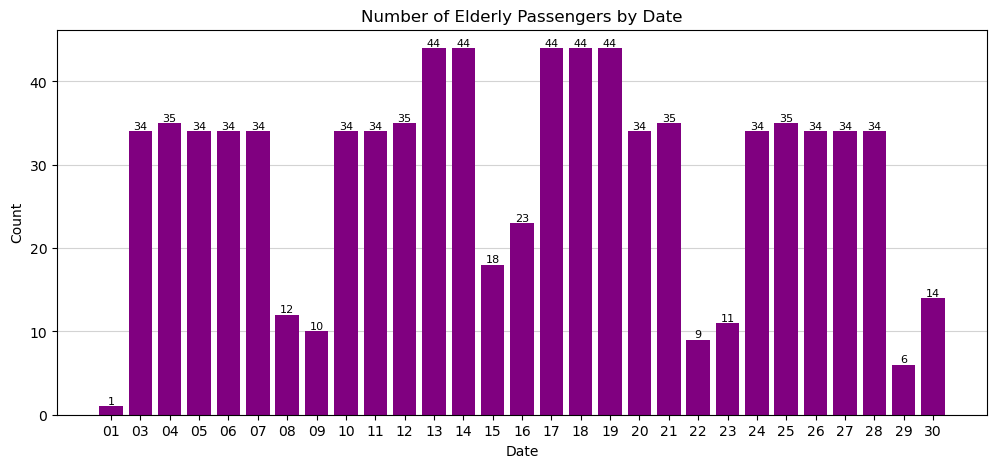

In [242]:
plt.figure(figsize=(12, 5))
elderly_byDate = plt.bar(df_elderly["tapInDate"], df_elderly["count"], color="purple", zorder = 2)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Number of Elderly Passengers by Date")
plt.grid(True, "major", "y", zorder = 1)

for bar in elderly_byDate:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.4, yval, int(yval), ha='center', va='bottom', fontsize=8)
    
plt.grid(True,"major","y",c="lightgray", zorder=1)
plt.show()

The pattern of use among the elderly is similar to the general pattern of use, although the contrast between weekdays and weekends is not as strong. 

In [244]:
df_elderly_hourly = df[df["ageCategory"]=="elderly"].groupby(["tapInHour"]).size().reset_index(name="count")

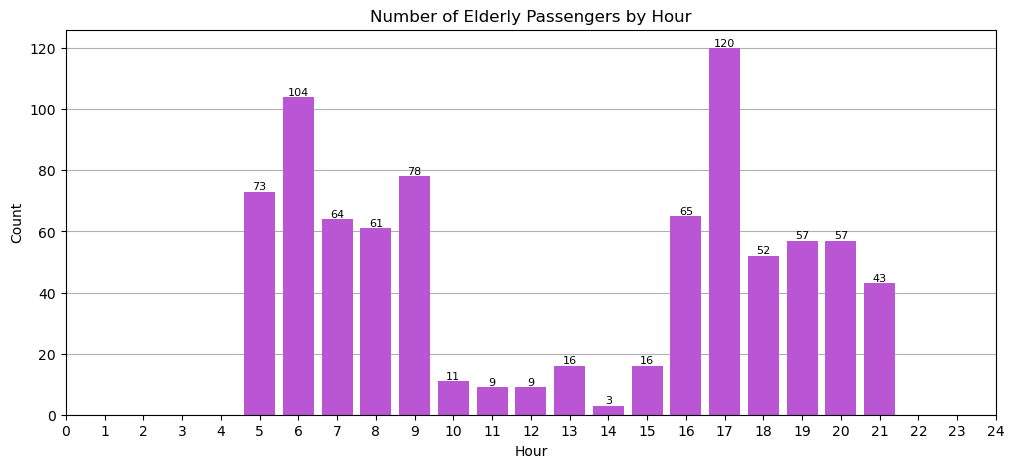

In [245]:
plt.figure(figsize=(12, 5))
elderly_byHour = plt.bar(df_elderly_hourly["tapInHour"], df_elderly_hourly["count"], color="mediumorchid", zorder = 2)
plt.xlabel("Hour")
plt.ylabel("Count")

plt.xticks(range(0,25))
plt.title("Number of Elderly Passengers by Hour")
plt.grid(True, "major", "y", zorder = 1)

for bar in elderly_byHour:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.4, yval, int(yval), ha='center', va='bottom', fontsize=8)

plt.show()

Similarly, the hourly pattern of elderly also follows the general pattern of use.

#### Busiest corridor and stops for elderly

In [248]:
df_elderly = df[df["ageCategory"]=="elderly"]
df_elderly_corridor = df_elderly.groupby(["corridorID", "corridorName"]).size().reset_index(name="count")
df_elderly_corridor = df_elderly_corridor.sort_values(by="count", ascending= False).reset_index()
df_elderly_corridor.head(5)

,index,corridorID,corridorName,count
0,28,6V,Ragunan - Gelora Bung Karno,76
1,75,M1,Blok M - Kota,41
2,56,JAK.21,Cililitan - Dwikora,41
3,35,9A,PGC 2 - Grogol 2,41
4,25,6N,Ragunan - Blok M via Kemang,41


In [249]:
df_elderly_tapIns = df_elderly.groupby(["tapInStops", "tapInStopsName"]).size().reset_index(name="tap in count")
df_elderly_tapIns = df_elderly_tapIns.sort_values(by="tap in count", ascending= False).reset_index()
df_elderly_tapIns = df_elderly_tapIns.rename(columns={"tapInStops": "tapStops", "tapInStopsName":"tapStopsName" })
df_elderly_tapIns.drop(columns=["index"], inplace=True)

df_elderly_tapOuts = df_elderly.groupby(["tapOutStops", "tapOutStopsName"]).size().reset_index(name="tap out count")
df_elderly_tapOuts = df_elderly_tapOuts.sort_values(by="tap out count", ascending= False).reset_index()
df_elderly_tapOuts = df_elderly_tapOuts.rename(columns={"tapOutStops": "tapStops", "tapOutStopsName":"tapStopsName" })
df_elderly_tapOuts.drop(columns=["index"], inplace=True)

#combined the tap counts
elderly_tap_count = pd.merge(df_elderly_tapIns, df_elderly_tapOuts, on=["tapStops", "tapStopsName"], how="outer")
elderly_tap_count.fillna(0, inplace=True)

elderly_tap_count["total count"] = elderly_tap_count["tap in count"]+elderly_tap_count["tap out count"]
elderly_tap_count = elderly_tap_count.sort_values(by="total count", ascending= False).reset_index()

In [250]:
elderly_tap_count.head()

,index,tapStops,tapStopsName,tap in count,tap out count,total count
0,0,P00133,Masjid Agung,21.0,21.0,42.0
1,26,B00248P,Cibubur Junction,20.0,20.0,40.0
2,21,P00016,BKN,20.0,20.0,40.0
3,2,P00256,MH Thamrin,21.0,1.0,22.0
4,19,B05666P,Tanah Abang 2,20.0,1.0,21.0


In [251]:
trip_duration_elderly =  df[df["ageCategory"]=="elderly"]["tripDuration"].dt.total_seconds() / 60
df_trip_duration_elderly = pd.DataFrame(trip_duration_elderly.value_counts()).reset_index()
df_trip_duration_elderly = df_trip_duration_elderly.sort_values(by= "tripDuration")
shortest_trip = df_trip_duration_elderly.min()[0]
longest_trip = df_trip_duration_elderly.max()[0]
average_trip = df_trip_duration_elderly.mean()[0]

print(f"The elderly trips range from {shortest_trip.round(2)} minutes to {longest_trip.round(2)} minutes. On average, the elderly spend {average_trip.round(2)} minutes on the trip.")

The elderly trips range from 15.12 minutes to 144.68 minutes. On average, the elderly spend 71.87 minutes on the trip.


#### Key Takeaways : 

* Despite the fact that 40.93% are of retirement age, the usage pattern of the elderly still follows the general usage pattern. Both by day (high on weekdays and low on weekends) and by hour (high during peak hours).
* Ragunan - Gelora Bung Karno is the corridor that are most used by the elderly
* Masjid Agung, Cibubur Junction and BKN are the stops which the elderly go to/from. 

**On Corridors :**
* Bus route Ragunan - Gelora Bung Karno connects strategic roads in South Jakarta. During commuting hours and after work, this route is quite crowded with passengers because it reaches office areas and strategic areas in Mampang and Sudirman. 

* Since the ridership pattern of the elderly is the same as other age categories, it is better to add more dedicated seats for the elderly in this corridor. Officers, especially on this route, need to be trained to pay attention to seniors and encourage other passengers to give seats to this elderly group.


**On Bus Stops:**
* It is important to review the condition of the bus stops, particularly at the Masjid Agung, Cibubur Junction and BKN.
* Access in and out: at the Masjid Agung and Cibubur Junction, access to the busway stops is from the ground floor (ground level) plus a ramp at the Masjid Agung bus stop. At the BKN bus stop, access to the busway stop must be via stairs as there is no elevator. There are currently no designated areas for elderly passengers to wait at these bus stops.
* It is recommended that a place and facilities for first aid be provided at these bus stops, given that the elderly are more vulnerable to illness and accidents (such as falling).
*  The following improvements could be prioritised by PT Transjakarta for future implementation:
    1. Building elevators at BKN bus stops
    2. Adding some dedicated seating for the elderly on the bus and also at the bus stop
    3. Installing first aid facilities (which can also be used by pregnant women and people with disabilities)

***
# 6. Summary : 
## Insights, Actionable Plans and the Next Steps

### A. Insights
As a public service, PT Transjakarta goal is to improve it services: providing safe, reliable & comfortable public transportation. 
From the dataset, we can draw several insights : 

**General Ridership Pattern**
* The average trip duration is 72 minutes, with a range of 15 to 179 minutes. 
* The majority of trips occur on weekdays. There are significantly fewer trips on weekends (only 21% of weekdays).
* On weekdays, there are morning busy hours (between 5-10 AM) and evening busy hours (between 16-22 PM).
* Analysis are done by analysing patterns on weekdays and busy hours - that have bigger impact.

**Ridership Pattern : Corridor**
* Cibubur-Balai Kota is the busiest corridor, both during morning and evening rush hours.
* By scaling up the average with the population/sample ratio, it is estimated that there are 7143 passengers on a weekday during the morning rush hour and 6964 passengers on a weekday during the evening rush hours riding this route.
* During busy hours, the number of passengers ranges from 330 to 644. However, between 6-7 AM and 17-18 PM there are peaks of 1006 and 1053 passengers. respectively. This figure allows us to calculate the number of fleets required to serve the passengers, thus avoiding overcrowding and long waits.
* It is estimated that, at these peak times, ideally one bus should depart every 1 minute 40 seconds to avoid passengers crowding at Transjakarta bus stops. 

**Ridership Pattern : Bus stop**
* Both tap in and tap hour follow a similar pattern, but there is a difference of one hour between the spikes in tap ins and tap outs.
* The busiest bus stops during rush hours are: Penjaringan, Garuda Taman Mini, and BKN.
* At bus stop Penjaringan: It is estimated that there are approximately 14,700 total taps at the Perjaringan bus stop on a typical weekday, with a peak of 11,950 tap-ins and 9,600 tap-outs per hour occurring at evening rush hours. This figure allows us to calculate the capacity of the waiting area at this bus stop.
* Based on the estimated 1,195 entries and 960 exits, we can estimate that approximately 20 people enter the bus stop and tap in, and 16 people exit the bus stop and tap out each minute. 

**Geographical mapping**
* geographical maps that show the location of the busiest bus stops.

**Passenger Demographic**
* Although there is no significant difference in the number of men and women, there are generally more women than men at busy hours.
* Male and female travellers follow the same travel pattern, with the majority travelling during the morning and evening peak hours.
* The sample includes 838 elderly individuals, 495 of whom (59.07%) are within the maximum working age bracket (60-64), while 343 (40.93%) are within the retirement age bracket (65+).
* Despite the fact that 40.93% of the sample is of retirement age, the usage pattern of the elderly still follows the general usage pattern.
* The duration of elderly trips ranges from 15.12 minutes to 144.68 minutes, with an average of 72 minutes per trip.
* The most frequently used corridor by the elderly is Ragunan - Gelora Bung Karno, while the most frequently used bus stops are Masjid Agung, Cibubur Junction and BKN.
* Access in and out: at the Masjid Agung and Cibubur Junction, access to the busway stops is from the ground floor (ground level) plus a ramp at the Masjid Agung bus stop. At the BKN bus stop, access to the busway stop must be via stairs as there is no elevator. There are currently no designated areas for elderly passengers to wait at these bus stops.


### B. Actionable Plan


Based on the above insights, we can now develop some practical action plans: 

* The average journey duration of more than one hour each way is exhausting for passengers. As long as traffic conditions in Jakarta and surrounding areas have not improved. Transjakarta as much as possible provides a comfortable journey: from travelling to the bus stop, tapping in, waiting for the bus, riding the bus, getting off the bus, tapping out, exiting the bus stop.

**Cibubur-Balai Kota Corridors**
* It is estimated that, during the peak times, ideally one bus should depart every 1 minute 40 seconds. However, this is difficult to achieve due to the time required for passengers to get on and off the bus. There are a number of potential strategies that could be employed, including: 
* To enhance the capacity of the bus service during peak periods. As an illustration, if the bus capacity at 6 p.m. is 90 (for instance, with double buses), the frequency of buses could be increased to every five minutes during peak hours.
* Another potential solution is to enhance the capacity of bus stops, allowing for a greater number of passengers to wait simultaneously, also allowing several buses to stop at the same time

**Halte Penjaringan**
* Based on the assumption that 30-seat capacity buses arrive every three minutes, the Penjaringan bus stop should be axpanded to meet the requirement of a waiting area with the capacity to accommodate approximately 560 passengers during peak hours to prevent congestion. Alternatively, the waiting area should be able to accommodate 260 passengers if the buses arrive every two minutes during the peak hour.
* Theres is an estimation that approximately 20 people enter the bus stop and tap in, and 16 people exit the bus stop and tap out each minute during the peak hour.  The figure calculated above can also be used to make decisions about the size of the bus stop, the width of the lanes entering and exiting the bus stop, and the number of turnstiles at the bus stop. 

**Service for Women**
* Considering that there are more women than men and that many cases of sexual harassment have occurred in Transjakarta, it is desirable to add more women-only buses and seats or expand the women-only waiting area to ensure their safety. Especially during the morning and evening rush hours, which are usually very crowded.

**Service for the elderly**
* The most used corridor by the elderly is Ragunan - GBK corridor. but this corridor is quite crowded with passengers because it reaches office areas and strategic areas in Mampang and Sudirman, especially during rush hours. Add more dedicated seats for the elderly in this corridor and train the officers to pay attention to seniors and encourage other passengers to give seats to this elderly group.
* It is important to review the condition of the bus stops, particularly at the Masjid Agung, Cibubur Junction and BKN.
* The following improvements could be prioritised for future implementation:
    1. Building elevators at BKN bus stops
    2. Adding some dedicated seating for the elderly on the bus and also at the bus stop
    3. Installing first aid facilities (which can also be used by pregnant women and people with disabilities)

### C. The Next Steps


* The sampe method can be applied to other corridors and bus stops to gain similar insights.. Once the capacity of each bus corridor is known especially during peak hours, the utilisation of the bus fleet can be optimised. Buses from less-crowded corridors can be redirected to more heavily-trafficked routes, and in the event of insufficient capacity, new buses can be procured. This analysis can result in more efficient bus procurement. Similarly, mapping the working hours of Transjakarta bus drivers can also be beneficial.
* By analysing the number of people who tap in and tap out at a particular bus stop, the required capacity at that bus stop, the width of the corridor and the number of turnstiles required for a smooth tapping in and out process can be determined.
* Do analysis on other age group, for instance: children.
* This project focuses on how PT Transjakarta can improve its transportation service. However, the dataset also includes data on payment methods and bus fares for each corridor. This allows for analysis of different card usage and its correlation to total revenue.
* Please note that this dataset only records trips on April 2023. Should we identify a pattern over a longer term (for example, several years), we will be able to make predictions. For instance, we may wish to ascertain whether there will be an increase in transactions or whether we require additional corridors. 